## Greg Lee-Podgorski - Head of Machine Learning & Technology Platforms @ RS

# NLP - TEXT ANALYSIS - RS tweets

 ## I. Define & Scope

 **The Brief**

Based on downloaded sets of Twitter replies and mentions to our company brands: RS Components (with handle @RSComponents) and DesignSpark (handle @DesignSparkRS) from recent past, visualize and analyze the text, getting a read on sentiment of our customers, suppliers and other Twitter followers. Create word clouds to visually highlight most common themes.

**i) Intro & my role in the organization**

**Methods & tools**

In this exercise I'm going to apply text analysis method(s) of Machine Learning to textual comments of people following 2 of our brands, namely our core RS Components brand and Design Spark (an online brand for community of inventors, engineers, DIY scientists and tinkerers), on Twitter. While text sentiment analysis consist of a number of methods available to be used, we can roughly divide them into 2 major groups:

1. Lexicon-based methods
2. Machine Learning-based methods.


I'm going to use TextBlob method as an example of lexicon-based method and NLTK to illustrate ML-based approach.
TextBlob is a Python (2 and 3) library for processing textual data. It provides a simple API for diving into common natural language processing (NLP) tasks such as part-of-speech tagging, noun phrase extraction, sentiment analysis, classification, translation, and more.

Natural Language Toolkit, commonly referred to as NLTK, is a suite of libraries and programs for symbolic and statistical natural language processing (NLP) for English written in the Python programming language. It was developed by Steven Bird and Edward Loper in the Department of Computer and Information Science at the University of Pennsylvania.

In addition Bag of Words, Stopword Filtering and Bigram Collocations methods are also commonly used in conjunction with the above approaches for feature set generation and I'm going to employ some of them to progress through my project.


**My role**

I happen to hold a position of Head of Machine Learning & Technology Platform within the Electrocomponents PLC Group (RS Components is a trading name in the UK and EMEA). Thus I am an outspoken advocate for increased use of ML in our organization and also a passionate believer in value that deploying ML algorithms into our operations can unlock for us.

**ii) Background**

RS Components is a publicly listed corporation and trades on LSE (London Stock Exchange) under Electrocomponents PLC trade name. We have significant trading presence in each of the top economically most active regions - EMEA, APAC and Americas.
Due to wildly varying standards across any number of electronic products specifications that have local requirements, whether voltage, number of prongs/holes in a electric socket, certification standards or just local engineer's preferences, standarization is a challenge for RS and thus we need to stock very large range of products. As it stands RS currently has over 500,000 SKU's (over 0.5 million product in stock) and over 2.5 million non-stock products which we can drop-ship for our clients from our global supplier base. That means that while most of online stores would be content with coming up with a Top 100 best selling products, out Best Sellers list features slightly over 10,000 products. Some of the products on that best-sellers' list vary only slightly from their "cousins", e.g. by different AC/DC output or electrical resistance (in Ohms).

To make matters even more complicated we carry a number of distinct categories of products, e.g. BLE (Board Level Electronics) - something a computer maker like Asus or Dell would need, or IA&C (Undustrial Automation & Control) - e.g. assembly line sensors monitoring health of a conveyor belt, or PPE (Personal Protection Equipment) - e.g. gloves or protective masks engineers or doctors can cover their faces with.

**iii) Problem statement and potential business application**

With such a large number of suppliers and huge array of products offered, across at times distinct categories, some of those products being stocked and others being offered via drop-shipping services, we market that offering to prospective buyers via an omni-channel sales model. While we generate majority of sales via our online store, we maintain sizeable brick and mortar presence (what we call Trade Counters), strategically located distribution centers and large sales force.
We also receive very large volume of purchase orders arriving via emails and faxes plus call centers stacked with CS agents which can also accept and process orders via phone.
What that means that our customers have multiple channels via which to offer us their feedback and provide us with valuable information. While we do track our clients' satisfaction via common marketing & sales measures, mainly NPS (Net Promoter Score), we don't really analyze sentiment of our clients and suppliers nor do we track changes in that sentiment over time.

Twitter profiles of our brands, with several tens of thousands of followers, seem particularly dynamic and rich source of customer feedback and it could be a great place to start - given its volume of comments (limited by both length of characters as well as manageable number of followers) and ease of use (from client's perspective).
If we prove we can derive actionable insight from those tweets and keep utilizing sentiment analysis to amend our marketing approach and product offering, that could open doors to company-wide acceptance of algorithmic methods of analyzing customers' feedback and increased use of Machine Learning overall in our organization.

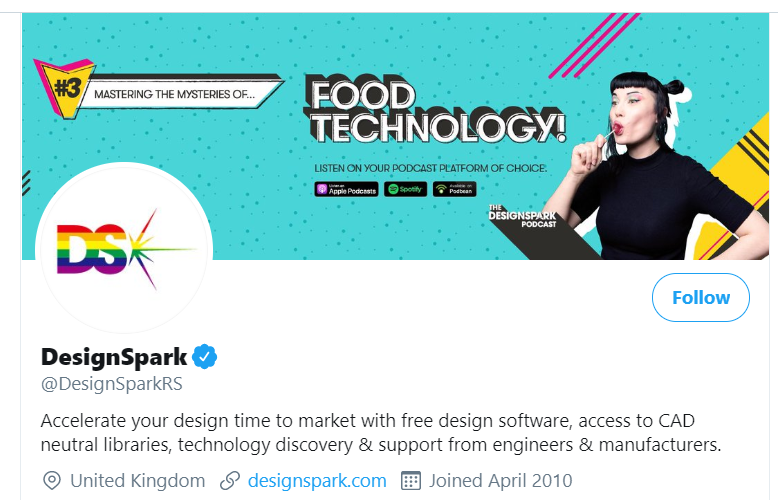

 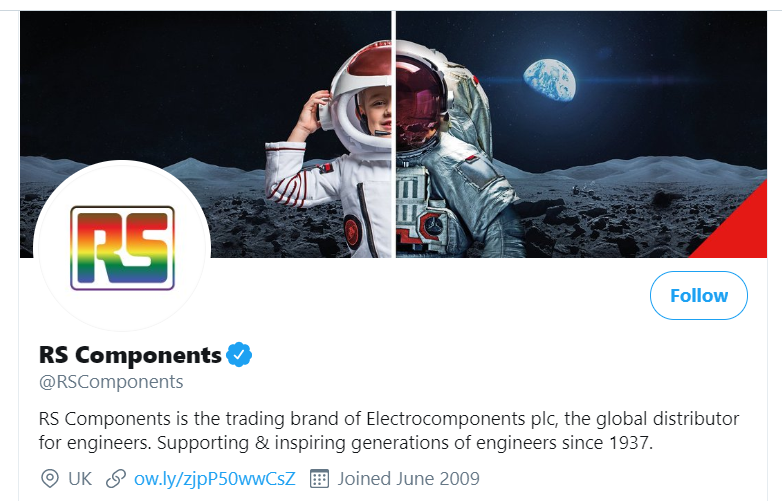

**iv) Data**

To procure Tweeter data one could use Twitter API - one of the most commonly used being Tweepy - as an authorized back-end method to source large number of tweets.
In this, however, to save time and avoid challenges around 2-factor authentication (which I had run into while trying Tweepy), I have used paid service called Vicinitas IO (can be found at https://www.vicinitas.io/ ).
It's a web-based tool that enables one to filter tweets by specific handles or words and to download such tweets, exporting them into convient csv files.

The aforementioned exported tweet files have the following structure:


 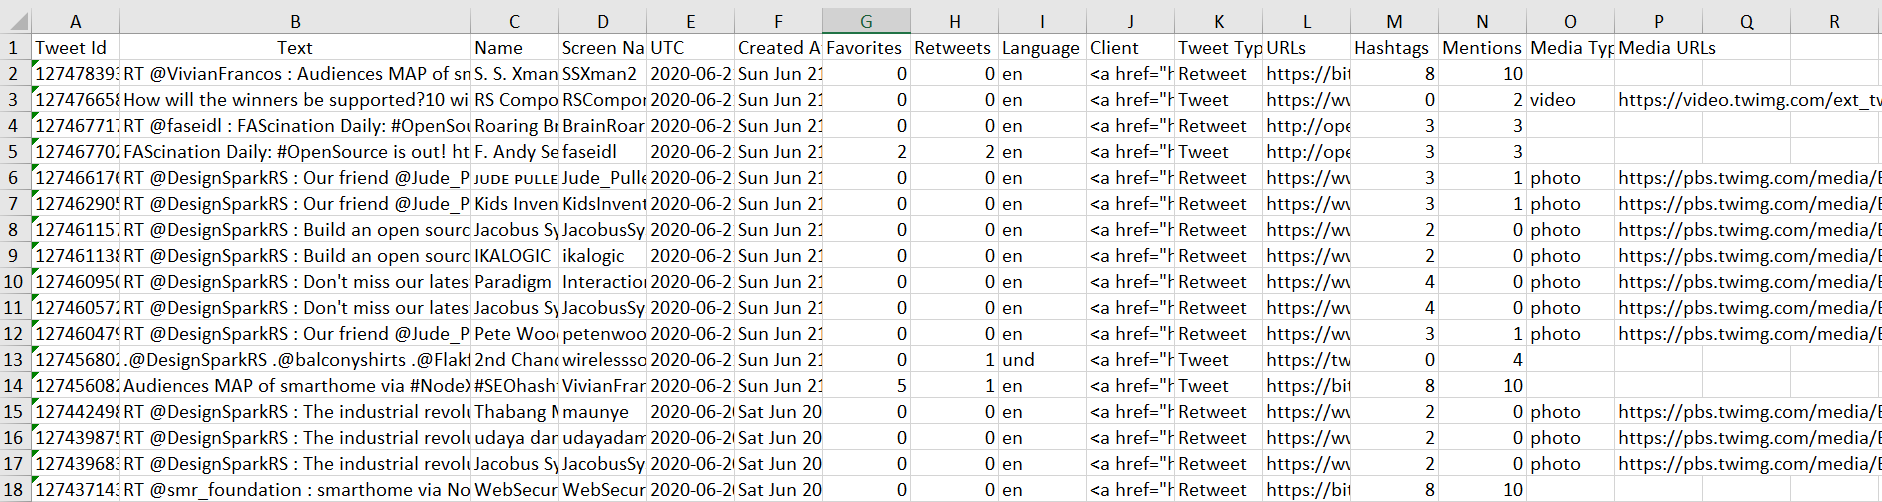

**v) Data protection**

Since Twitter is a social media platform and widely available at that (assuming one clears low bar of registering oneself with an email address and a name), a user signing Twitter's ToS (Terms of Service) agrees expressis verbis to its commentary being visible and available for marketing and analytical purposes, including use by third parties. 
In the light of such consent, there is no need to concern oneself with data protection, as here users granted their permission indirectly to use their data.

## Loading libraries

In [1]:
# For data and matrix manipulation
import pandas as pd
import numpy as np

from pandas.core.common import flatten  # Collapse lists of lists

# For visualisation
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud, ImageColorGenerator  # Wordclouds
import cufflinks as cf

import plotly.graph_objs as go
from chart_studio.plotly import plot, iplot

# For string manipulation
import re 
import string

# For text pre-processing
import emoji
import itertools
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize   # Split text into significant forms (correspondingly: words and/or sentences)
from nltk.corpus import stopwords, wordnet           # List of common words
from nltk.stem import PorterStemmer, WordNetLemmatizer   # Reduce words to their root form ("lemma")
from nltk import pos_tag  # Tag words with parts of speech

from collections import defaultdict  # Dictionaries that have a backup value

from sklearn.feature_extraction.text import CountVectorizer # Convert text to sparse matrices
from sklearn.feature_extraction.text import TfidfTransformer  # To compute the TF-IDF score



from textblob import TextBlob  # Sentiment analysis

import gensim


from gensim.models.ldamodel import LdaModel  # Topic extraction

from gensim.models.phrases import Phrases # ngrams

from gensim.test.utils import common_texts
from gensim.models import Phrases

from gensim import corpora, models, similarities  # Vectorization

import pyLDAvis.gensim  # Visualise topics

# To analyze sentiment in social media
from nltk.sentiment.vader import SentimentIntensityAnalyzer

from collections import Counter  # Count word frequency

In [2]:
# Necessary dependencies from NLTK
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

import collections
import nltk.classify.util, nltk.metrics

# For assigning sentiment polarity scores
from textblob import TextBlob

# For extracting features -- i.e. the document-term matrix
from sklearn.feature_extraction.text import CountVectorizer

# For splitting the data into a training and a testing set
from sklearn.model_selection import train_test_split

# For using Naive Bayes - the typical basic machine learning algorithm of choice for Text analytics
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier

# For evaluating our machine learning model 
from sklearn.metrics import accuracy_score, classification_report

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\oszer\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\oszer\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\oszer\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


## Load data

1. Let's load first set of mentions and retweets for DesignSparkRS for mid-June period:

In [3]:
#Indicating file location and reading the xlsx file:
fileRS1 = r'..\DATA\vicinitas_search_results RS early Jul.xlsx'

raw_dataRS1 = pd.read_excel(fileRS1)

In [4]:
raw_dataRS1.head(10)

,Tweet Id,Text,Name,Screen Name,UTC,Created At,Favorites,Retweets,Language,Client,Tweet Type,URLs,Hashtags,Mentions,Media Type,Media URLs,Unnamed: 16,Unnamed: 17,Unnamed: 18
0,1279411800166084610,@hartlepooleylad Do the upper management @RSCo...,Trent_whisson_Art,Trentwhisson,2020-07-04T13:48:38.000Z,Sat Jul 04 13:48:38 +0000 2020,0,0,en,"<a href=""http://twitter.com/#!/download/ipad"" ...",Reply,NaN,0,2,NaN,NaN,NaN,NaN,NaN
1,1279342352168075269,RT @RSComponents : Listen to our exclusive int...,Jacobus Systems,JacobusSystems,2020-07-04T09:12:40.000Z,Sat Jul 04 09:12:40 +0000 2020,0,0,en,"<a href=""http://www.jacobus.co.uk"" rel=""nofoll...",Retweet,http://ow.ly/XVzA50AoOmv,1,0,photo,https://pbs.twimg.com/media/EcEigZFXYActmNN.jpg,NaN,NaN,NaN
2,1279257155280031744,@RSComponents @RadiallGroup @RadiallUSAInc @Co...,Rahul Kadlag,RahulKadlag2,2020-07-04T03:34:07.000Z,Sat Jul 04 03:34:07 +0000 2020,0,0,en,"<a href=""http://twitter.com/download/android"" ...",Reply,NaN,0,5,NaN,NaN,NaN,NaN,NaN
3,1279116295884148737,Excellent! Thank you to the University of Sout...,Electronics Weekly,ElectronicsNews,2020-07-03T18:14:24.000Z,Fri Jul 03 18:14:24 +0000 2020,0,0,en,"<a href=""https://mobile.twitter.com"" rel=""nofo...",Tweet,http://bit.ly/2f5lyZu https://twitter.com/ECSU...,1,2,NaN,NaN,NaN,NaN,NaN
4,1279097146478923779,RT @ChrisGoodwillUK : New STEM Activities adde...,FemTech_🖥👩🏽‍💻,femtech_,2020-07-03T16:58:18.000Z,Fri Jul 03 16:58:18 +0000 2020,0,0,en,"<a href=""https://rike.dev"" rel=""nofollow"">frie...",Retweet,NaN,2,8,photo,https://pbs.twimg.com/media/EZ-3s8CXsAURady.jpg,NaN,NaN,NaN
5,1279097124681068545,RT @ChrisGoodwillUK : New STEM Activities adde...,Debbie Goodwill,CodeCreatesUK,2020-07-03T16:58:13.000Z,Fri Jul 03 16:58:13 +0000 2020,0,0,en,"<a href=""https://mobile.twitter.com"" rel=""nofo...",Retweet,NaN,2,8,photo,https://pbs.twimg.com/media/EZ-3s8CXsAURady.jpg,NaN,NaN,NaN
6,1279088740284149760,#EWBrightSparks 2020 profile: Jordan Albutt - ...,Electronics Weekly,ElectronicsNews,2020-07-03T16:24:54.000Z,Fri Jul 03 16:24:54 +0000 2020,2,0,en,"<a href=""https://mobile.twitter.com"" rel=""nofo...",Tweet,https://www.electronicsweekly.com/news/ew-brig...,1,3,NaN,NaN,NaN,NaN,NaN
7,1279073109606371328,RT @RSComponents : This is a new use for our i...,DesignSpark,DesignSparkRS,2020-07-03T15:22:48.000Z,Fri Jul 03 15:22:48 +0000 2020,0,0,en,"<a href=""http://twitter.com/download/iphone"" r...",Retweet,https://twitter.com/hepner_alex/status/1278660...,0,0,NaN,NaN,NaN,NaN,NaN
8,1279064650164908032,RT @RSComponents : We have partnered with Give...,Carga Rápida,engcargarapida,2020-07-03T14:49:11.000Z,Fri Jul 03 14:49:11 +0000 2020,0,0,en,"<a href=""http://twitter.com/download/android"" ...",Retweet,http://ow.ly/umRs50Airif,3,1,photo,https://pbs.twimg.com/media/EbbYEUiWsAAKABE.jpg,NaN,NaN,NaN
9,1279061572938276865,RT @XinaBox : Virtual Door Button using @Mongo...,ESP32,ESP32net,2020-07-03T14:36:57.000Z,Fri Jul 03 14:36:57 +0000 2020,0,0,en,"<a href=""https://tapbots.com/software/tweetbot...",Retweet,https://www.hackster.io/gotfredsen/virtual-doo...,0,5,photo,https://pbs.twimg.com/media/Eb_j8nuWoAAFgMG.jpg,NaN,NaN,NaN


In [5]:
# Getting dataset 1 info
raw_dataRS1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164 entries, 0 to 163
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Tweet Id     164 non-null    int64 
 1   Text         164 non-null    object
 2   Name         164 non-null    object
 3   Screen Name  164 non-null    object
 4   UTC          164 non-null    object
 5   Created At   164 non-null    object
 6   Favorites    164 non-null    int64 
 7   Retweets     164 non-null    int64 
 8   Language     164 non-null    object
 9   Client       163 non-null    object
 10  Tweet Type   164 non-null    object
 11  URLs         91 non-null     object
 12  Hashtags     164 non-null    int64 
 13  Mentions     164 non-null    int64 
 14  Media Type   96 non-null     object
 15  Media URLs   96 non-null     object
 16  Unnamed: 16  7 non-null      object
 17  Unnamed: 17  3 non-null      object
 18  Unnamed: 18  3 non-null      object
dtypes: int64(5), object(14)
memor

As we can see, our first DesignSpark twitter dataset has 597 rows and 18 columns.

2. Let's load now the second set of mentions and retweets for DesignSparkRS - this time for period of late June-start of July:

In [6]:
#Indicating file location and reading the xlsx file:
fileRS2 = r'..\DATA\vicinitas_search_10day tweets of RS.xlsx'

raw_dataRS2 = pd.read_excel(fileRS2)

In [7]:
raw_dataRS2.tail(10)

,Tweet Id,Text,Name,Screen Name,UTC,Created At,Favorites,Retweets,Language,Client,Tweet Type,URLs,Hashtags,Mentions,Media Type,Media URLs,Unnamed: 16,Unnamed: 17
149,1272240278968156162,RT @RSComponents : Do you have a budding young...,#win,win_hq,2020-06-14T18:51:34.000Z,Sun Jun 14 18:51:34 +0000 2020,0,0,en,"<a href=""http://example.com"" rel=""nofollow"">Si...",Retweet,http://ow.ly/17L950zYBOV,3,0,photo,https://pbs.twimg.com/media/EafdMx1WkAA0k5N.jpg,NaN,NaN
150,1272189375028162560,Nuovi resistori ad alta precisione da @RS Comp...,Elettronica TECH,ElettTech,2020-06-14T15:29:17.000Z,Sun Jun 14 15:29:17 +0000 2020,0,0,it,"<a href=""https://social.zoho.com"" rel=""nofollo...",Tweet,https://zcu.io/0Ps7,2,3,photo,https://pbs.twimg.com/media/Eae5fqmU8AAWr9E.jpg,NaN,NaN
151,1272164134302502915,@pe1mew @thethingsntwrk @TTNApeldoorn @Apeldoo...,Ryan Walmsley,ryanteck,2020-06-14T13:48:59.000Z,Sun Jun 14 13:48:59 +0000 2020,0,0,en,"<a href=""https://about.twitter.com/products/tw...",Reply,NaN,0,5,NaN,NaN,NaN,NaN
152,1272164120272478208,RT @RSComponents : Inspiring the next generati...,DesignSpark,DesignSparkRS,2020-06-14T13:48:56.000Z,Sun Jun 14 13:48:56 +0000 2020,0,0,en,"<a href=""http://twitter.com/download/iphone"" r...",Retweet,http://ow.ly/g6Zp50A5gk5,1,2,video,https://video.twimg.com/ext_tw_video/127212051...,NaN,NaN
153,1272146019078324224,@ryanteck @thethingsntwrk @TTNApeldoorn @Apeld...,Remko,pe1mew,2020-06-14T12:37:00.000Z,Sun Jun 14 12:37:00 +0000 2020,1,0,en,"<a href=""https://about.twitter.com/products/tw...",Reply,NaN,0,5,NaN,NaN,NaN,NaN
154,1272124783942144000,RT @RSComponents : Inspiring the next generati...,Ruth Amos 🚀,RuthAmos,2020-06-14T11:12:38.000Z,Sun Jun 14 11:12:38 +0000 2020,0,0,en,"<a href=""http://twitter.com/download/iphone"" r...",Retweet,http://ow.ly/g6Zp50A5gk5,1,2,video,https://video.twimg.com/ext_tw_video/127212051...,NaN,NaN
155,1272008375707078656,RT @RSComponents : Pulse Oximeters measure oxy...,Lesther B.,LestherSK,2020-06-14T03:30:04.000Z,Sun Jun 14 03:30:04 +0000 2020,0,0,en,"<a href=""http://twitter.com/download/iphone"" r...",Retweet,http://ow.ly/y9cL50A5RsF,1,0,photo,https://pbs.twimg.com/media/EaToyi9XgAAjhZQ.jpg,NaN,NaN
156,1271860908592173056,So I guess @RSComponents will gladly dispatch ...,Filip,Minkovsky,2020-06-13T17:44:05.000Z,Sat Jun 13 17:44:05 +0000 2020,0,0,en,"<a href=""https://mobile.twitter.com"" rel=""nofo...",Tweet,NaN,0,2,NaN,NaN,NaN,NaN
157,1271842380870610950,RT @basheerep : @RSComponents \n\nI have order...,Basheer,basheerep,2020-06-13T16:30:27.000Z,Sat Jun 13 16:30:27 +0000 2020,0,0,en,"<a href=""http://twitter.com/download/android"" ...",Retweet,NaN,0,1,NaN,NaN,NaN,NaN
158,1271841345959866368,@RSComponents \n\nI have order a tool in your ...,Basheer,basheerep,2020-06-13T16:26:21.000Z,Sat Jun 13 16:26:21 +0000 2020,0,1,en,"<a href=""http://twitter.com/download/android"" ...",Tweet,NaN,0,1,NaN,NaN,NaN,NaN


## Explore & Transform:

In [8]:
# Getting shape info of 2nd dataset:
raw_dataRS2.shape

(159, 18)

This time there were less tweets - 161 - and we also have 2 less columns. 
Casual glance tells us the first dataset *up front) has 2 completely useless columns on the right ('Unnamed: 16'  and	'Unnamed: 17'). 

In [9]:
raw_dataRS2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Tweet Id     159 non-null    int64 
 1   Text         159 non-null    object
 2   Name         159 non-null    object
 3   Screen Name  159 non-null    object
 4   UTC          159 non-null    object
 5   Created At   159 non-null    object
 6   Favorites    159 non-null    int64 
 7   Retweets     159 non-null    int64 
 8   Language     159 non-null    object
 9   Client       159 non-null    object
 10  Tweet Type   159 non-null    object
 11  URLs         95 non-null     object
 12  Hashtags     159 non-null    int64 
 13  Mentions     159 non-null    int64 
 14  Media Type   93 non-null     object
 15  Media URLs   93 non-null     object
 16  Unnamed: 16  2 non-null      object
 17  Unnamed: 17  1 non-null      object
dtypes: int64(5), object(13)
memory usage: 22.5+ KB


Now we need to combine these 2 datasets with tweets of Design Spark so that we end up with a single dataframe containing all mentions of and replies to DesignSparkRS over recent weeks.

If both datasets had non-matching number of columns and different content in them, we would have had to use pd.merge function:

In [10]:
# raw_dataDS1.merge(raw_dataDS2, how = 'outer')

Given that the 2nd dataset has 2 more columns but otherwise they both have pretty much the same structure, we will use another approach - modified .concat function:

In [11]:
#Combining 2 datasets, with parameter 'sort' set to 'False'
frames = [raw_dataRS1, raw_dataRS2]
df = pd.concat(frames, sort=False)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 323 entries, 0 to 158
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Tweet Id     323 non-null    int64 
 1   Text         323 non-null    object
 2   Name         323 non-null    object
 3   Screen Name  323 non-null    object
 4   UTC          323 non-null    object
 5   Created At   323 non-null    object
 6   Favorites    323 non-null    int64 
 7   Retweets     323 non-null    int64 
 8   Language     323 non-null    object
 9   Client       322 non-null    object
 10  Tweet Type   323 non-null    object
 11  URLs         186 non-null    object
 12  Hashtags     323 non-null    int64 
 13  Mentions     323 non-null    int64 
 14  Media Type   189 non-null    object
 15  Media URLs   189 non-null    object
 16  Unnamed: 16  9 non-null      object
 17  Unnamed: 17  4 non-null      object
 18  Unnamed: 18  3 non-null      object
dtypes: int64(5), object(14)
memor

In [13]:
df.sample(5)

,Tweet Id,Text,Name,Screen Name,UTC,Created At,Favorites,Retweets,Language,Client,Tweet Type,URLs,Hashtags,Mentions,Media Type,Media URLs,Unnamed: 16,Unnamed: 17,Unnamed: 18
124,1272798064579837962,@RSComponents\nOrder 13 May\nOrder conf - £32....,Saint Jimmer™,stjimmer,2020-06-16T07:48:00.000Z,Tue Jun 16 07:48:00 +0000 2020,0,0,en,"<a href=""http://tapbots.com/tweetbot"" rel=""nof...",Tweet,NaN,0,1,photo,https://pbs.twimg.com/media/EanjFRbXQAc2B5z.jpg,https://pbs.twimg.com/media/EanjFUCWkAAtcJM.jpg,https://pbs.twimg.com/media/EanjFW0X0AEC92_.jpg,NaN
52,1278636779709648898,@pdc_racing @HistoricSCC @70sRoadSports @RSCom...,Rich @MotoringEvents,MotoringEvents,2020-07-02T10:28:58.000Z,Thu Jul 02 10:28:58 +0000 2020,2,1,en,"<a href=""http://twitter.com/download/iphone"" r...",Reply,NaN,0,4,NaN,NaN,NaN,NaN,NaN
150,1272189375028162560,Nuovi resistori ad alta precisione da @RS Comp...,Elettronica TECH,ElettTech,2020-06-14T15:29:17.000Z,Sun Jun 14 15:29:17 +0000 2020,0,0,it,"<a href=""https://social.zoho.com"" rel=""nofollo...",Tweet,https://zcu.io/0Ps7,2,3,photo,https://pbs.twimg.com/media/Eae5fqmU8AAWr9E.jpg,NaN,NaN,NaN
81,1273270818160742400,RT @XinaBox : ESP32 Server and Many ESP8266 Cl...,p francois,pfranco06271879,2020-06-17T15:06:33.000Z,Wed Jun 17 15:06:33 +0000 2020,0,0,en,"<a href=""https://mobile.twitter.com"" rel=""nofo...",Retweet,https://www.hackster.io/ben-dixon/esp32-server...,0,6,photo,https://pbs.twimg.com/media/EatKe4XWAAE_2v9.jpg,NaN,NaN,NaN
76,1278404132085391366,@pdc_racing @HistoricSCC @70sRoadSports @RSCom...,BlackTopMedia,BlackTopMediaUK,2020-07-01T19:04:31.000Z,Wed Jul 01 19:04:31 +0000 2020,4,1,en,"<a href=""http://twitter.com/download/android"" ...",Reply,NaN,0,4,NaN,NaN,NaN,NaN,NaN


In [14]:
#Checking what languages we are dealing with:
df['Language'].unique()

array(['en', 'de', 'und', 'es', 'nl', 'it'], dtype=object)

In [15]:
#If there had been many different entries in the array above, we could easily get the count by using the below snippet:
df.Language.nunique()

6

Let's count the observations for each of the unique values we have obtained:

In [16]:
df['Language'].value_counts()

en     311
es       4
de       4
und      2
nl       1
it       1
Name: Language, dtype: int64

Since all but 3 tweets are in English, we can just go ahead and drop those altogether:

In [17]:
#Filtering by English value in Lagnuage column:
df = df[df['Language'] == 'en']

In [18]:
#Checking if we got the right outcome:
df.shape

(311, 19)

Normally there would have been a fair amount of data cleaning left to do in other columns, but for text analysis we only really need content of one column, i.e. Text.

In [19]:
tweets = df['Text']

In [20]:
#Checking content of our single column left:
tweets

0      @hartlepooleylad Do the upper management @RSCo...
1      RT @RSComponents : Listen to our exclusive int...
2      @RSComponents @RadiallGroup @RadiallUSAInc @Co...
3      Excellent! Thank you to the University of Sout...
4      RT @ChrisGoodwillUK : New STEM Activities adde...
                             ...                        
154    RT @RSComponents : Inspiring the next generati...
155    RT @RSComponents : Pulse Oximeters measure oxy...
156    So I guess @RSComponents will gladly dispatch ...
157    RT @basheerep : @RSComponents \n\nI have order...
158    @RSComponents \n\nI have order a tool in your ...
Name: Text, Length: 311, dtype: object

In [21]:
# Keep only couple more interesting columns

tweets_expanded = df[['Text', 'Name', 'Screen Name', 'Client', 'Tweet Type' ,'Media Type' ]]

In [22]:
tweets_expanded.sample(10)

,Text,Name,Screen Name,Client,Tweet Type,Media Type
122,@RSComponents My order number is on the screen...,Saint Jimmer™,stjimmer,"<a href=""http://tapbots.com/tweetbot"" rel=""nof...",Reply,NaN
59,RT @NordicTweets : ⚡Last call ⚡ Join #ConnectC...,DesignSpark,DesignSparkRS,"<a href=""https://mobile.twitter.com"" rel=""nofo...",Retweet,photo
153,@ryanteck @thethingsntwrk @TTNApeldoorn @Apeld...,Remko,pe1mew,"<a href=""https://about.twitter.com/products/tw...",Reply,NaN
81,RT @XinaBox : ESP32 Server and Many ESP8266 Cl...,p francois,pfranco06271879,"<a href=""https://mobile.twitter.com"" rel=""nofo...",Retweet,photo
82,RT @XinaBox : Fast-Tracked Python IoT Developm...,sanjosetek,sanjosetek,"<a href=""http://twitter.com/download/android"" ...",Retweet,NaN
146,"@RSComponents I have, thanks",Filip,Minkovsky,"<a href=""https://mobile.twitter.com"" rel=""nofo...",Reply,NaN
53,Servo Control with Capacitive Touch Using Xina...,XinaBox,XinaBox,"<a href=""https://xinabox.cc"" rel=""nofollow"">Me...",Tweet,photo
154,RT @RSComponents : Inspiring the next generati...,Ruth Amos 🚀,RuthAmos,"<a href=""http://twitter.com/download/iphone"" r...",Retweet,video
20,@EbenUpton @DavidAGraham @Raspberry_Pi @cpc_tw...,Jonathan Davey,jonathandavey,"<a href=""https://mobile.twitter.com"" rel=""nofo...",Reply,NaN
37,@BHamadicharef @9600 @DesignSparkRS @RSCompone...,PE0SAT - Jan v Gils,pe0sat,"<a href=""https://mobile.twitter.com"" rel=""nofo...",Reply,NaN


Let's check how many types of messages there are in our dataframe:

In [23]:
tweets_expanded['Tweet Type'].value_counts()

Retweet    180
Reply       67
Tweet       64
Name: Tweet Type, dtype: int64

In [24]:
tweets_expanded['Media Type'].value_counts()

photo    146
video     38
Name: Media Type, dtype: int64

We can do the same with device type (aka Client):

In [25]:
tweets_expanded['Client'].value_counts()

<a href="https://mobile.twitter.com" rel="nofollow">Twitter Web App</a>                    109
<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>          63
<a href="http://twitter.com/download/android" rel="nofollow">Twitter for Android</a>        60
<a href="http://www.jacobus.co.uk" rel="nofollow">Jacobus Systems 1</a>                     18
<a href="https://xinabox.cc" rel="nofollow">MediaCannon</a>                                 11
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>          9
<a href="https://www.hootsuite.com" rel="nofollow">Hootsuite Inc.</a>                        7
<a href="http://twitter.com/#!/download/ipad" rel="nofollow">Twitter for iPad</a>            6
<a href="http://tapbots.com/tweetbot" rel="nofollow">Tweetbot for iΟS</a>                    5
<a href="https://www.flickr.com" rel="nofollow">Tweetcam17</a>                               4
<a href="https://rike.dev" rel="nofollow">friendly

In [26]:
#Checking how many times our brand (RS) is invoked:
tweets_expanded.Text.str.contains(' RS ', case=False).value_counts()

False    236
True      75
Name: Text, dtype: int64

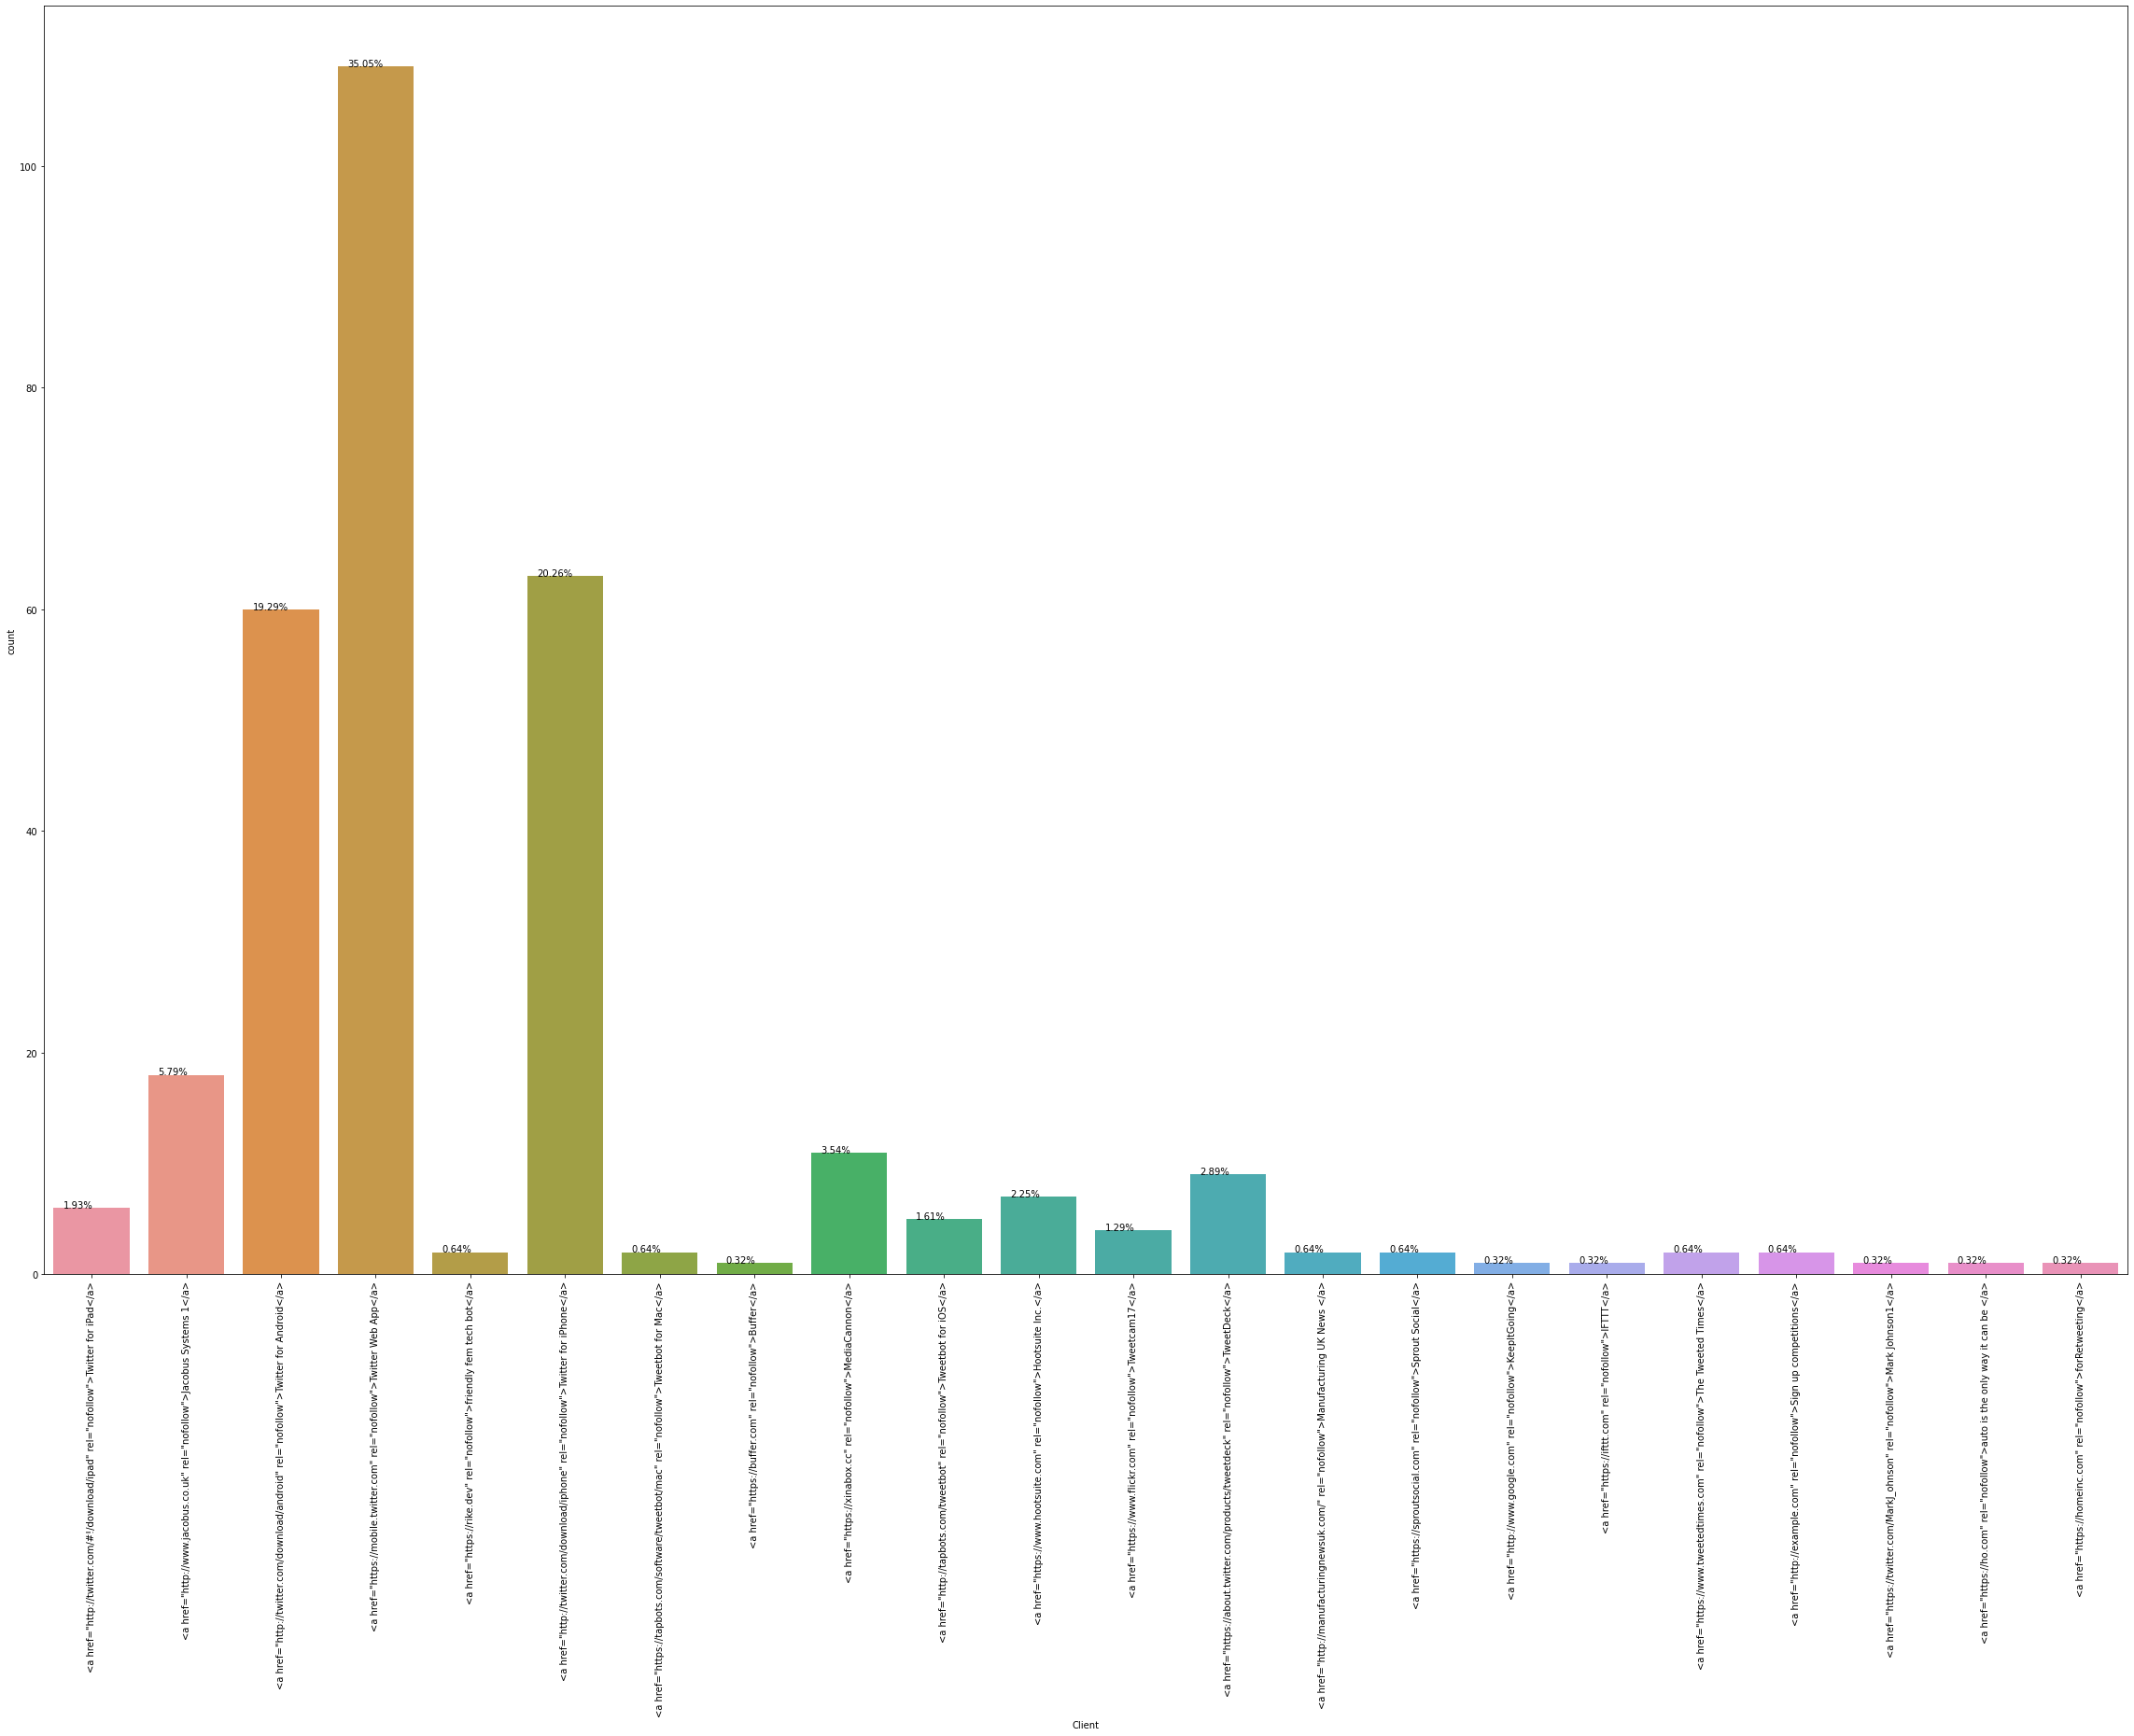

In [27]:
# Visualization by country
plt.figure(figsize=(40,25))
ax = sns.countplot(x='Client', data=tweets_expanded)
plt.xticks(rotation=90)

total = len(tweets_expanded['Client'])*1.
for p in ax.patches:
    ax.annotate('{:.2f}%'.format(100*p.get_height()/total), (p.get_x()+0.1, p.get_height()))

We can see that almost 43% of all tweets were sent from Android OS phones, 21.75% of Twitterati used Twitter web app and over 18.5% people used iPhones.

### Examining text

In [28]:
#Extracting the full tweet text of 201st tweet:
tweets_expanded.iloc[200]['Text']

'RT @pdc_racing : Thanks for the mention 👍  Good to see @LewisHamilton supporting STEM and equality too. Will turbocharge awareness.  Delighted to be doing good with @RSComponents @RS_LG_ https://t.co/ERXBCNcOTi'

In [29]:
#Filtering by all types of message other than Retweets in Tweet Type column:
tw_replies = tweets_expanded[tweets_expanded['Tweet Type'] != 'Retweet']

In [30]:
#Retrieving text of a selected tweet that wasn't a retweet:
tw_replies.iloc[10]['Text']

'@jazzmans @9600 @DesignSparkRS @RSComponents Well its historical value I guess nowadays - and its nice if it still works'

In [31]:
tw_replies.head()

,Text,Name,Screen Name,Client,Tweet Type,Media Type
0,@hartlepooleylad Do the upper management @RSCo...,Trent_whisson_Art,Trentwhisson,"<a href=""http://twitter.com/#!/download/ipad"" ...",Reply,NaN
2,@RSComponents @RadiallGroup @RadiallUSAInc @Co...,Rahul Kadlag,RahulKadlag2,"<a href=""http://twitter.com/download/android"" ...",Reply,NaN
3,Excellent! Thank you to the University of Sout...,Electronics Weekly,ElectronicsNews,"<a href=""https://mobile.twitter.com"" rel=""nofo...",Tweet,NaN
6,#EWBrightSparks 2020 profile: Jordan Albutt - ...,Electronics Weekly,ElectronicsNews,"<a href=""https://mobile.twitter.com"" rel=""nofo...",Tweet,NaN
10,Who owns what space junk? https://t.co/FsHqF2h...,dailywaffle.co.uk,DailyWaffle,"<a href=""https://buffer.com"" rel=""nofollow"">Bu...",Tweet,photo


## Sentiment Analysis

In [32]:
# Creating sentiment object
sent=SentimentIntensityAnalyzer()
sent.polarity_scores("ridiculous")

{'neg': 1.0, 'neu': 0.0, 'pos': 0.0, 'compound': -0.3612}

In [33]:
#Measuring sentiment score of a random sentence I have just created:
sent.polarity_scores("I feel let down by your crappy product")

{'neg': 0.375, 'neu': 0.625, 'pos': 0.0, 'compound': -0.5574}

In [34]:
# For illustration purposes creating a list of sentences:
sentences = ['WTF', 'Pretty good product', 'Never again will I buy from you, losers', 'Meh - nothing special']

In [35]:
# Looping through the list above, using For function:
for x in sentences:
    print(sent.polarity_scores(x))

{'neg': 1.0, 'neu': 0.0, 'pos': 0.0, 'compound': -0.5859}
{'neg': 0.0, 'neu': 0.141, 'pos': 0.859, 'compound': 0.7269}
{'neg': 0.362, 'neu': 0.638, 'pos': 0.0, 'compound': -0.5267}
{'neg': 0.781, 'neu': 0.219, 'pos': 0.0, 'compound': -0.3732}


In [36]:
#We can obviously use the same approach to run through the whole set of tweets:
for x in tweets:
    print(sent.polarity_scores(x))

{'neg': 0.162, 'neu': 0.638, 'pos': 0.2, 'compound': 0.0772}
{'neg': 0.0, 'neu': 0.856, 'pos': 0.144, 'compound': 0.4939}
{'neg': 0.0, 'neu': 0.838, 'pos': 0.162, 'compound': 0.7964}
{'neg': 0.0, 'neu': 0.805, 'pos': 0.195, 'compound': 0.7772}
{'neg': 0.0, 'neu': 0.863, 'pos': 0.137, 'compound': 0.5574}
{'neg': 0.0, 'neu': 0.863, 'pos': 0.137, 'compound': 0.5574}
{'neg': 0.0, 'neu': 0.899, 'pos': 0.101, 'compound': 0.4003}
{'neg': 0.0, 'neu': 0.786, 'pos': 0.214, 'compound': 0.4588}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 0.741, 'pos': 0.259, 'compound': 0.8897}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 0.862, 'pos': 0.138, 'compound': 0.6486}
{'neg': 0.025, 'neu': 0.662, 'pos': 0.313, 'compound': 0.9599}
{'n

In [37]:
# Defining a function that will pply the Analyzer to the entire dataframe and returning only "compound" score:
def apply_sentiment_score(text):
    return sent.polarity_scores(text)["compound"]

In [38]:
#Applying the function, creating a new column in our dataframe:
tweets_expanded["Vader_sentiment"]=tweets_expanded["Text"].apply(apply_sentiment_score)

In [39]:
#Pulling the observations with newly created column containing sentiment score:
tweets_expanded.sample(6)

,Text,Name,Screen Name,Client,Tweet Type,Media Type,Vader_sentiment
158,@RSComponents \n\nI have order a tool in your ...,Basheer,basheerep,"<a href=""http://twitter.com/download/android"" ...",Tweet,NaN,0.5423
45,RT @RSComponents : Do you have everything you ...,Raman Sharma,ramanhimachali,"<a href=""http://twitter.com/download/iphone"" r...",Retweet,photo,0.6808
81,On a different note than the @easyJet madness....,Yannis Toubakaris,Jotoid,"<a href=""https://mobile.twitter.com"" rel=""nofo...",Tweet,NaN,0.6696
79,RT @RSComponents : It's the last chance to con...,DesignSpark,DesignSparkRS,"<a href=""https://mobile.twitter.com"" rel=""nofo...",Retweet,photo,0.7256
94,ESP32 Server and Many ESP8266 Clients Controll...,XinaBox,XinaBox,"<a href=""https://xinabox.cc"" rel=""nofollow"">Me...",Tweet,photo,0.0000
143,"Mike England, COO @RSComponents joins me on T...",Neil C. Hughes,NeilCHughes,"<a href=""https://mobile.twitter.com"" rel=""nofo...",Tweet,photo,0.8658


In [40]:
##Applying the function, creating a new column in our dataframe but this time ignoring retweets:
tw_replies["Vader_sentiment"]=tw_replies["Text"].apply(apply_sentiment_score)

In [41]:
tw_replies.sample(3)

,Text,Name,Screen Name,Client,Tweet Type,Media Type,Vader_sentiment
154,"Remote Proximity Sensing with XinaBox, @Zerynt...",XinaBox,XinaBox,"<a href=""https://xinabox.cc"" rel=""nofollow"">Me...",Tweet,photo,0.0000
33,@9600 @DesignSparkRS @RSComponents Nice machin...,eb3frn,eb3frn,"<a href=""http://twitter.com/#!/download/ipad"" ...",Reply,NaN,0.7906
134,Following their People Counter project on Desi...,DesignSpark,DesignSparkRS,"<a href=""https://sproutsocial.com"" rel=""nofoll...",Tweet,photo,0.6597


Let's examine the distribton of the compound sentiment scores:

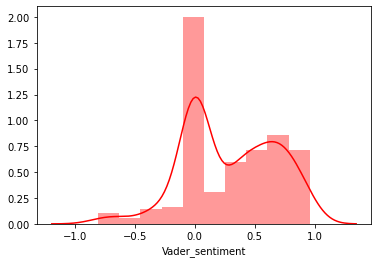

In [42]:
figsize=(10, 8)
sns.distplot(tweets_expanded["Vader_sentiment"], color="r")

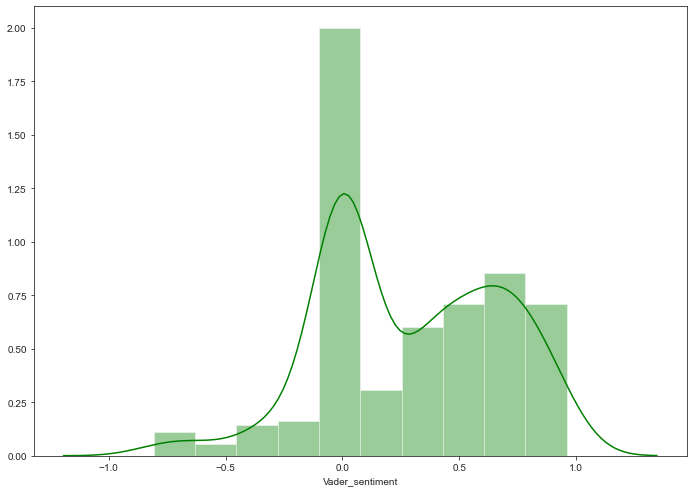

In [43]:
sns.set_style('ticks')
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(11.7, 8.27)
sns.distplot(tweets_expanded["Vader_sentiment"], ax=ax, color="g") 

We can see that the way observations occur across the dataset spectrum resembles a normal distribution - with slim tails, albeit modified somewhat.

Let's check that distribution for tweets without re-tweets:

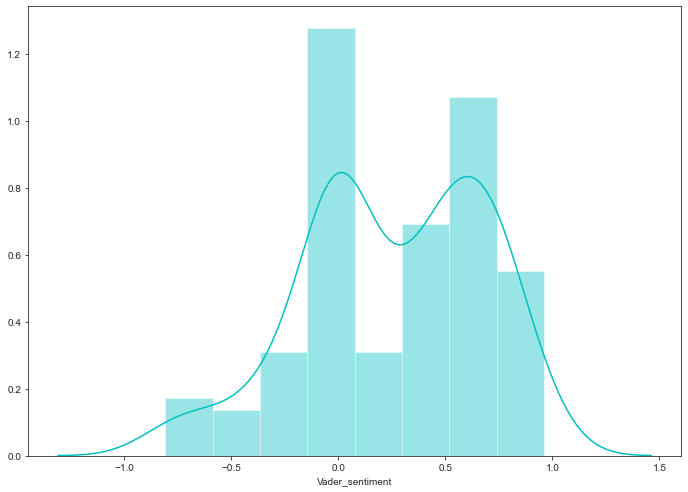

In [44]:
sns.set_style('ticks')
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(11.7, 8.27)
sns.distplot(tw_replies["Vader_sentiment"], ax=ax, color="c") 

**It would appear that genuine tweets that are not just re-tweets of official messages, have distribution skewed more positively. There is clearly advantage of strongly positive sentiment messages over strongly negative ones when it comes to sentiment around DesignSpark.**

Let's now assign numerical sentiment scores to 3 major categories of sentiment: positive, neutral or negative:

In [45]:
#Creating a sentiment_type column which categorizes tweets as positive, negative or neutral
def categorise_sentiment(score):
    if score > 0.4:
        return "positive"
    elif score < -0.15:
        return "negative"
    else:
        return "neutral"

In [46]:
#Creating a new column with the types:

tweets_expanded["sentiment_type"]=tweets_expanded["Vader_sentiment"].apply(categorise_sentiment)

In [47]:
#Creating a new column with the types of sentiment groups - but for non retweets subset:

tw_replies["sentiment_type"]=tw_replies["Vader_sentiment"].apply(categorise_sentiment)

In [48]:
tweets_expanded.head()

,Text,Name,Screen Name,Client,Tweet Type,Media Type,Vader_sentiment,sentiment_type
0,@hartlepooleylad Do the upper management @RSCo...,Trent_whisson_Art,Trentwhisson,"<a href=""http://twitter.com/#!/download/ipad"" ...",Reply,NaN,0.0772,neutral
1,RT @RSComponents : Listen to our exclusive int...,Jacobus Systems,JacobusSystems,"<a href=""http://www.jacobus.co.uk"" rel=""nofoll...",Retweet,photo,0.4939,positive
2,@RSComponents @RadiallGroup @RadiallUSAInc @Co...,Rahul Kadlag,RahulKadlag2,"<a href=""http://twitter.com/download/android"" ...",Reply,NaN,0.7964,positive
3,Excellent! Thank you to the University of Sout...,Electronics Weekly,ElectronicsNews,"<a href=""https://mobile.twitter.com"" rel=""nofo...",Tweet,NaN,0.7772,positive
4,RT @ChrisGoodwillUK : New STEM Activities adde...,FemTech_🖥👩🏽‍💻,femtech_,"<a href=""https://rike.dev"" rel=""nofollow"">frie...",Retweet,photo,0.5574,positive


In [49]:
tw_replies.head()

,Text,Name,Screen Name,Client,Tweet Type,Media Type,Vader_sentiment,sentiment_type
0,@hartlepooleylad Do the upper management @RSCo...,Trent_whisson_Art,Trentwhisson,"<a href=""http://twitter.com/#!/download/ipad"" ...",Reply,NaN,0.0772,neutral
2,@RSComponents @RadiallGroup @RadiallUSAInc @Co...,Rahul Kadlag,RahulKadlag2,"<a href=""http://twitter.com/download/android"" ...",Reply,NaN,0.7964,positive
3,Excellent! Thank you to the University of Sout...,Electronics Weekly,ElectronicsNews,"<a href=""https://mobile.twitter.com"" rel=""nofo...",Tweet,NaN,0.7772,positive
6,#EWBrightSparks 2020 profile: Jordan Albutt - ...,Electronics Weekly,ElectronicsNews,"<a href=""https://mobile.twitter.com"" rel=""nofo...",Tweet,NaN,0.4003,positive
10,Who owns what space junk? https://t.co/FsHqF2h...,dailywaffle.co.uk,DailyWaffle,"<a href=""https://buffer.com"" rel=""nofollow"">Bu...",Tweet,photo,0.0000,neutral


In [50]:
#Extracting tweets with negative sentiment:
tweets_expanded[tweets_expanded["sentiment_type"]=="negative"]

,Text,Name,Screen Name,Client,Tweet Type,Media Type,Vader_sentiment,sentiment_type
25,@hepner_alex @SCAS999 @RSComponents No mention...,alan,alan_macd,"<a href=""http://twitter.com/download/iphone"" r...",Reply,NaN,-0.2960,negative
32,@9600 @DesignSparkRS @RSComponents Wicked!,Tony,virtutek,"<a href=""http://twitter.com/download/iphone"" r...",Reply,NaN,-0.5707,negative
71,RT @gavinjohnson09 : @pdc_racing @HistoricSCC ...,PDC Racing,pdc_racing,"<a href=""http://twitter.com/download/android"" ...",Retweet,NaN,-0.6696,negative
73,RT @BlackTopMediaUK : @pdc_racing @HistoricSCC...,PDC Racing,pdc_racing,"<a href=""http://twitter.com/download/android"" ...",Retweet,NaN,-0.2666,negative
76,@pdc_racing @HistoricSCC @70sRoadSports @RSCom...,BlackTopMedia,BlackTopMediaUK,"<a href=""http://twitter.com/download/android"" ...",Reply,NaN,-0.2666,negative
77,@pdc_racing @HistoricSCC @70sRoadSports @RSCom...,Gavin Johnson,gavinjohnson09,"<a href=""http://twitter.com/download/android"" ...",Reply,NaN,-0.6696,negative
83,Ridiculous idea @RSComponents Don't stand so ...,Chris West,Droolzee,"<a href=""https://mobile.twitter.com"" rel=""nofo...",Tweet,NaN,-0.3612,negative
87,RT @RSComponents : Coming online in 2021 our B...,Chris Curtis,cicurtis,"<a href=""http://twitter.com/#!/download/ipad"" ...",Retweet,photo,-0.3164,negative
88,RT @RSComponents : Coming online in 2021 our B...,Jacobus Systems,JacobusSystems,"<a href=""http://www.jacobus.co.uk"" rel=""nofoll...",Retweet,photo,-0.3164,negative
105,@parcelforce can you please please please sort...,Ian @ 21st Century,21stcenturyelec,"<a href=""https://mobile.twitter.com"" rel=""nofo...",Tweet,photo,-0.2677,negative


In [51]:
#Let's sort the tweets from most positive sentiment score, in a descending manner:
tweets_expanded.sort_values(by="Vader_sentiment", ascending=False)

,Text,Name,Screen Name,Client,Tweet Type,Media Type,Vader_sentiment,sentiment_type
18,@alan_macd @SCAS999 @RSComponents Let me corre...,AlexHepner,hepner_alex,"<a href=""http://twitter.com/download/iphone"" r...",Reply,NaN,0.9599,positive
160,RT @RSComponents : Can you design a solution t...,DesignSpark,DesignSparkRS,"<a href=""http://twitter.com/download/iphone"" r...",Retweet,photo,0.9432,positive
56,RT @RSComponents : Can you design a solution t...,#win,win_hq,"<a href=""http://example.com"" rel=""nofollow"">Si...",Retweet,photo,0.9432,positive
39,RT @pdc_racing : Thanks for the mention 👍 Goo...,Gavin Johnson,gavinjohnson09,"<a href=""http://twitter.com/download/android"" ...",Retweet,NaN,0.9313,positive
40,Thanks for the mention 👍 Good to see @LewisHa...,PDC Racing,pdc_racing,"<a href=""http://twitter.com/download/android"" ...",Tweet,NaN,0.9313,positive
...,...,...,...,...,...,...,...,...
71,RT @gavinjohnson09 : @pdc_racing @HistoricSCC ...,PDC Racing,pdc_racing,"<a href=""http://twitter.com/download/android"" ...",Retweet,NaN,-0.6696,negative
161,Hard computer science problems: @RSComponents ...,William Marriage,williammarriage,"<a href=""https://mobile.twitter.com"" rel=""nofo...",Tweet,photo,-0.7003,negative
118,"@RSComponents Also, why do you not accept Pay...",Bart Read,bart_read,"<a href=""https://mobile.twitter.com"" rel=""nofo...",Tweet,NaN,-0.7568,negative
124,@RSComponents\nOrder 13 May\nOrder conf - £32....,Saint Jimmer™,stjimmer,"<a href=""http://tapbots.com/tweetbot"" rel=""nof...",Tweet,photo,-0.7901,negative


In [52]:
#Let's sort the tweets from most positive sentiment score, in a descending manner:
tw_replies.sort_values(by="Vader_sentiment", ascending=False)

,Text,Name,Screen Name,Client,Tweet Type,Media Type,Vader_sentiment,sentiment_type
18,@alan_macd @SCAS999 @RSComponents Let me corre...,AlexHepner,hepner_alex,"<a href=""http://twitter.com/download/iphone"" r...",Reply,NaN,0.9599,positive
40,Thanks for the mention 👍 Good to see @LewisHa...,PDC Racing,pdc_racing,"<a href=""http://twitter.com/download/android"" ...",Tweet,NaN,0.9313,positive
95,Join #workpride on the 26/06 to hear stories o...,myGwork - LGBT+ business community,myGwork,"<a href=""https://mobile.twitter.com"" rel=""nofo...",Tweet,photo,0.9287,positive
42,Extrication drill for #trainee ECAs with @SCAS...,AlexHepner,hepner_alex,"<a href=""http://twitter.com/download/iphone"" r...",Tweet,photo,0.8897,positive
32,@DavidAGraham @Raspberry_Pi @cpc_tweet @RSComp...,Eben Upton,EbenUpton,"<a href=""https://mobile.twitter.com"" rel=""nofo...",Reply,NaN,0.8784,positive
...,...,...,...,...,...,...,...,...
77,@pdc_racing @HistoricSCC @70sRoadSports @RSCom...,Gavin Johnson,gavinjohnson09,"<a href=""http://twitter.com/download/android"" ...",Reply,NaN,-0.6696,negative
161,Hard computer science problems: @RSComponents ...,William Marriage,williammarriage,"<a href=""https://mobile.twitter.com"" rel=""nofo...",Tweet,photo,-0.7003,negative
118,"@RSComponents Also, why do you not accept Pay...",Bart Read,bart_read,"<a href=""https://mobile.twitter.com"" rel=""nofo...",Tweet,NaN,-0.7568,negative
124,@RSComponents\nOrder 13 May\nOrder conf - £32....,Saint Jimmer™,stjimmer,"<a href=""http://tapbots.com/tweetbot"" rel=""nof...",Tweet,photo,-0.7901,negative


## Working with words

In [53]:
#Let's pull text of a random tweet, choosing one with lots of @'s and words:
tw_replies.iloc[49]["Text"]

'10,000 3D printed face shields have been donated to Ghana thanks to @RSComponents @N3DPS and @igusuk. Find out more at https://t.co/SNO6rUJ39B #GiveBackGhana #Covid19 #3DPrinting #PPE https://t.co/Kdjo6R7IUR'

In [54]:
##We can use RegEx in Python e.g.
## [#@]\w+ - to find any words starting with AT (malpa or hashtag, regardless of length of characters
    
## \d matches a digit
## \w+ any alphanumeric characters - regardless of length
## \d{2}-\d{2}-d{4}

In [55]:
#Creating a new column to process text on:
tw_replies['clean_text'] = tw_replies['Text']

#Converting all the tweets to lowercase:
tw_replies["clean_text"] = tw_replies["clean_text"].str.lower()

In [56]:
tw_replies.iloc[49]["clean_text"]

'10,000 3d printed face shields have been donated to ghana thanks to @rscomponents @n3dps and @igusuk. find out more at https://t.co/sno6ruj39b #givebackghana #covid19 #3dprinting #ppe https://t.co/kdjo6r7iur'

### Preprocessing text:

We can git rid of URL, emojis and hashtags.

To do that we use Regex (regular expressions):

Remove hashtags and mentions: [@#]\w+

Remove URLs: http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+

Remove all non-letter characters: [^a-z ]

##### Lemmatisation:

"Lemmatisation (or lemmatization) in linguistics is the process of grouping together the inflected forms of a word so they can be analysed as a single item, identified by the word's lemma, or dictionary form.[1]

In computational linguistics, lemmatisation is the algorithmic process of determining the lemma of a word based on its intended meaning. Unlike stemming, lemmatisation depends on correctly identifying the intended part of speech and meaning of a word in a sentence, as well as within the larger context surrounding that sentence, such as neighboring sentences or even an entire document. As a result, developing efficient lemmatisation algorithms is an open area of research"

##### Tokenization:

Tokenization is a common task in Natural Language Processing (NLP). It’s a fundamental step in both traditional NLP methods like Count Vectorizer and Advanced Deep Learning-based architectures like Transformers.

Tokenization is a way of separating a piece of text into smaller units called tokens. Here, tokens can be either words, characters, or subwords. Hence, tokenization can be broadly classified into 3 types – word, character, and subword (n-gram characters) tokenization.

For example, consider the sentence: “Never give up”.

The most common way of forming tokens is based on space. Assuming space as a delimiter, the tokenization of the sentence results in 3 tokens – Never-give-up. 

As each token is a word, it becomes an example of Word tokenization.

Similarly, tokens can be either sentences, characters or subwords. For example, let us consider “smarter”:

Character tokens: s-m-a-r-t-e-r 

Subword tokens: smart-er


**Word Tokenization is the most commonly used tokenization algorithm. It splits a piece of text into individual words based on a certain delimiter. Depending upon delimiters, different word-level tokens are formed. Pretrained Word Embeddings such as Word2Vec and GloVe comes under word tokenization.**

##### Stop-words:

In computing, stop words are words which are filtered out before or after processing of natural language data (text).[1] Though "stop words" usually refers to the most common words in a language, there is no single universal list of stop words used by all natural language processing tools, and indeed not all tools even use such a list.

In [57]:
#Getting a stopword list
stops = stopwords.words("english")

In [58]:
# Getting rid of domain-specific words by extending list of Stopwords (from bottom section of code):
stops.extend(["designsparkrs", "co", "https", "rscomponents", "rs"])      

In [59]:
#Creating a user-defined function to do text precleaning in one swoop:

def cleans_text(sample_text):
    
    # Given a sample text (as a string), we first substitute a select few sybmols with white space
    sample_text = re.sub(r'[#|@|-|?|!]',r' ',sample_text)
    
    # We then strip extra white space
    sample_text = re.sub(r'\s+',r' ', sample_text)
    
    # Replace the apostrophe's variation
    sample_text = re.sub('’', '\'', sample_text)
    
    # Remove numbers
    sample_text = re.sub(r'\d+', r' ', sample_text)
    
    # Remove standard punctuation and replace with spaces
    sample_text = re.sub(r'\W', r' ', sample_text)
    
    # Remove the URLs = Convert a web address to the string `URL` 
    sample_text = re.sub(r'((www\.[^\s]+)|(https?://[^\s]+))', r' ', sample_text)
    
    # Then change everything to lower case
    sample_text = sample_text.lower()
    
    # For a proper sentiment analysis I could get under consideration also the results of emoticons
    # by transforming the icons into text, and later weight the icons value
    # using the emoji.demojize(text)
    # For this training, I'll simply remove the emojis
    sample_text = emoji.get_emoji_regexp().sub(' ', sample_text)

    # Replace the carriage return (now converted to \n from the emoji's)
    sample_text = re.sub('\n', '', sample_text)
    
    # Then lemmatize our words -- note,  stemming was deemed too crude here, and therefore not chosen
    sample_text = WordNetLemmatizer().lemmatize(sample_text)
    
    
    # Now that we transformed our text, we need to tokenize it. Let's treat each word as a token.
    words = word_tokenize(sample_text)
    
    # As we now have a list of words,  we can go ahead and find and remove those words that also belong to the 
    # stopwords list from the NLTK corpus
    words = [w for w in words if w not in stops]
    
    # We then proceed to joining those list of words, back to 'free text'  or string format
    text = ' '.join(words)
    
    return text

In [60]:
#Replace all URL'sthe mentions and hashtags with a space:
##tw_replies["clean_text"] = tw_replies["clean_text"].replace("[@#]\w+", " ", regex=True)
##tw_replies["clean_text"] = tw_replies["clean_text"].replace("http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*(),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+", " ", regex=True)
##tw_replies["clean_text"] = tw_replies["clean_text"].replace("[^a-z ]", " ", regex=True)

In [61]:
tweetz = tw_replies['clean_text']

In [62]:
#Applying our user-defined function to the tweet-set:
tweetz = tweetz.apply(lambda x: cleans_text(x))

In [63]:
#Checking top cleaned tweets:
tweetz.head()

0     hartlepooleylad upper management know tweeting...
2     radiallgroup radiallusainc connsupplier thanks...
3     excellent thank university southampton spreadi...
6     ewbrightsparks profile jordan albutt time high...
10                owns space junk fshqf hzxn zpazyoyzlx
Name: clean_text, dtype: object

In [64]:
tweetz.iloc[2]

'excellent thank university southampton spreading word ew brightsparks info selected see jwegz tmx ewbrightsparks ecsuos bdlvhynt'

Let's visualize now number of words in our clean, pre-processed tweets:

In [65]:
#Creating plotting function with Pandas histogram:
def plot_word_number_histogram(text):
    text.str.split().\
        map(lambda x: len(x)).\
        hist(grid=True)
    plt.xlabel("Nr of words", fontsize=15)
    plt.ylabel("Number of tweets",fontsize=15)
    plt.xlim([1.0,50.0]) # setting limit for the range of values on x axis

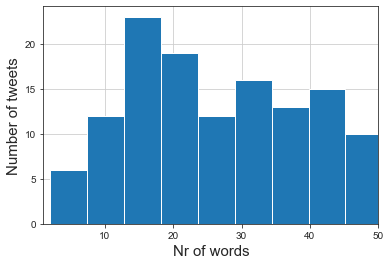

In [66]:
# Plotting using the function:
plot_word_number_histogram(tw_replies['clean_text'])

In [67]:
# VADER belongs to a type of sentiment analysis that is based on lexicons of sentiment-related words.
# Lexicons are expensive and time-consuming to produce means hence they are not updated often but 
# VADER is regularly updated.
import operator
import time

In [68]:
#Creating user-defined function to assign labels to sentiment scores and to do calculations:
def expand_score(value):
#     print(value)
#     print(type(value))
    if type(value) is str:
        if value == 'neu' or value == '0':
            return 'Neutral'
        elif value == 'pos':
            return 'Positive'
    elif type(value) is int or type(value) is float:
        if value == 0:
            return 'Neutral'
        elif value > 0:
            return 'Positive'
    
    return 'Negative'
    
    
def calc_polarity_vader(text):
    sid = SentimentIntensityAnalyzer()
    tmp_res = sid.polarity_scores(text)
    tmp_res.pop('compound')
    tmp_res = sorted(tmp_res.items(), key=operator.itemgetter(1), reverse=True)[0]
    return {'Sentiment': expand_score(tmp_res[0]), 'Score': tmp_res[1]}


def calc_polarity_textblob(text):
    tmp_res = TextBlob(text).sentiment
    return {'Sentiment': expand_score(tmp_res[0]), 'Score': tmp_res[0]}

In [69]:
#Creating new columns (With empty rows - for now):
tw_replies['Vader_vector'] = ''
tw_replies['TextBlob_vector'] = ''

In [70]:
for item in tw_replies.Text.iteritems():
    phrase = cleans_text(str(item[1]))
#     print(item[0], phrase)
    
    if phrase != '':
        tw_replies.loc[item[0], 'Vader_vector'] = calc_polarity_vader(phrase).get('Sentiment')
        tw_replies.loc[item[0], 'TextBlob_vector'] = calc_polarity_textblob(phrase).get('Sentiment')

In [71]:
tw_replies.head()

,Text,Name,Screen Name,Client,Tweet Type,Media Type,Vader_sentiment,sentiment_type,clean_text,Vader_vector,TextBlob_vector
0,@hartlepooleylad Do the upper management @RSCo...,Trent_whisson_Art,Trentwhisson,"<a href=""http://twitter.com/#!/download/ipad"" ...",Reply,NaN,0.0772,neutral,@hartlepooleylad do the upper management @rsco...,Neutral,Positive
2,@RSComponents @RadiallGroup @RadiallUSAInc @Co...,Rahul Kadlag,RahulKadlag2,"<a href=""http://twitter.com/download/android"" ...",Reply,NaN,0.7964,positive,@rscomponents @radiallgroup @radiallusainc @co...,Neutral,Positive
3,Excellent! Thank you to the University of Sout...,Electronics Weekly,ElectronicsNews,"<a href=""https://mobile.twitter.com"" rel=""nofo...",Tweet,NaN,0.7772,positive,excellent! thank you to the university of sout...,Neutral,Positive
6,#EWBrightSparks 2020 profile: Jordan Albutt - ...,Electronics Weekly,ElectronicsNews,"<a href=""https://mobile.twitter.com"" rel=""nofo...",Tweet,NaN,0.4003,positive,#ewbrightsparks 2020 profile: jordan albutt - ...,Neutral,Neutral
10,Who owns what space junk? https://t.co/FsHqF2h...,dailywaffle.co.uk,DailyWaffle,"<a href=""https://buffer.com"" rel=""nofollow"">Bu...",Tweet,photo,0.0000,neutral,who owns what space junk? https://t.co/fshqf2h...,Neutral,Positive


In [72]:
#Creating a new column which will compare scores of TextBlob vs that of Vader sentiment analysers:
tw_replies['Score_Match'] = tw_replies.apply(lambda cells: cells.Vader_vector == cells.TextBlob_vector, axis=1)

In [73]:
tw_replies.head()

,Text,Name,Screen Name,Client,Tweet Type,Media Type,Vader_sentiment,sentiment_type,clean_text,Vader_vector,TextBlob_vector,Score_Match
0,@hartlepooleylad Do the upper management @RSCo...,Trent_whisson_Art,Trentwhisson,"<a href=""http://twitter.com/#!/download/ipad"" ...",Reply,NaN,0.0772,neutral,@hartlepooleylad do the upper management @rsco...,Neutral,Positive,False
2,@RSComponents @RadiallGroup @RadiallUSAInc @Co...,Rahul Kadlag,RahulKadlag2,"<a href=""http://twitter.com/download/android"" ...",Reply,NaN,0.7964,positive,@rscomponents @radiallgroup @radiallusainc @co...,Neutral,Positive,False
3,Excellent! Thank you to the University of Sout...,Electronics Weekly,ElectronicsNews,"<a href=""https://mobile.twitter.com"" rel=""nofo...",Tweet,NaN,0.7772,positive,excellent! thank you to the university of sout...,Neutral,Positive,False
6,#EWBrightSparks 2020 profile: Jordan Albutt - ...,Electronics Weekly,ElectronicsNews,"<a href=""https://mobile.twitter.com"" rel=""nofo...",Tweet,NaN,0.4003,positive,#ewbrightsparks 2020 profile: jordan albutt - ...,Neutral,Neutral,True
10,Who owns what space junk? https://t.co/FsHqF2h...,dailywaffle.co.uk,DailyWaffle,"<a href=""https://buffer.com"" rel=""nofollow"">Bu...",Tweet,photo,0.0000,neutral,who owns what space junk? https://t.co/fshqf2h...,Neutral,Positive,False


In [74]:
print(f'2 sentiment scoring methods differ in {round((~tw_replies.Score_Match).sum() / tw_replies.shape[0] * 100, 2)}% of all tweets.')

2 sentiment scoring methods differ in 66.41% of all tweets.


**We can see that both sentiment evaluation methods have a match (same sentiment) in minority of cases (less than 45% of tweets).**

Let's see how different the results are across both methods of sentiment scoring:

In [75]:
# TextBlob sentiment score:
tw_replies.TextBlob_vector.value_counts()

Positive    68
Neutral     38
Negative    25
Name: TextBlob_vector, dtype: int64

In [76]:
# Vader sentiment:
tw_replies.Vader_vector.value_counts()

Neutral     125
Positive      6
Name: Vader_vector, dtype: int64

**We can tell that TextBlob is returning many more positive sentiment scores than Vader. Which, in turn, has more than double amount of neutral scores.**

Since we haven't captured TextBlob sentiments numerical scores in our df, let's do this now:

In [77]:
#Checking TextBlob sentiment score for the selected word:
TextBlob("great").sentiment

Sentiment(polarity=0.8, subjectivity=0.75)

In [78]:
tb_sent = tw_replies.iloc[49]["clean_text"]

In [79]:
#Checking TB sentiment for the specific tweet (row):
TextBlob(tb_sent).sentiment

Sentiment(polarity=0.35, subjectivity=0.35)

In [80]:
# Defining a function that will apply the TextBlob sentiment evaluator to the entire dataframe and returning only "polarity" score:
def apply_TextBlob_sentiment_score(text):
    return TextBlob(text).sentiment[0]  # SInce by default TextBlob.sentiment returns a tuple of (polarity, subjectivity) and we
    ## are only interested in the 1st one - polarity score - we can index a returned tuple like a list and only tell Python to return 1st value (hence '0')

In [81]:
#Applying the defined function across the whole column:
tw_replies["TextBlob_sentiment"] = tw_replies['clean_text'].apply(apply_TextBlob_sentiment_score)

In [82]:
tw_replies.head()

,Text,Name,Screen Name,Client,Tweet Type,Media Type,Vader_sentiment,sentiment_type,clean_text,Vader_vector,TextBlob_vector,Score_Match,TextBlob_sentiment
0,@hartlepooleylad Do the upper management @RSCo...,Trent_whisson_Art,Trentwhisson,"<a href=""http://twitter.com/#!/download/ipad"" ...",Reply,NaN,0.0772,neutral,@hartlepooleylad do the upper management @rsco...,Neutral,Positive,False,0.040000
2,@RSComponents @RadiallGroup @RadiallUSAInc @Co...,Rahul Kadlag,RahulKadlag2,"<a href=""http://twitter.com/download/android"" ...",Reply,NaN,0.7964,positive,@rscomponents @radiallgroup @radiallusainc @co...,Neutral,Positive,False,0.233333
3,Excellent! Thank you to the University of Sout...,Electronics Weekly,ElectronicsNews,"<a href=""https://mobile.twitter.com"" rel=""nofo...",Tweet,NaN,0.7772,positive,excellent! thank you to the university of sout...,Neutral,Positive,False,0.750000
6,#EWBrightSparks 2020 profile: Jordan Albutt - ...,Electronics Weekly,ElectronicsNews,"<a href=""https://mobile.twitter.com"" rel=""nofo...",Tweet,NaN,0.4003,positive,#ewbrightsparks 2020 profile: jordan albutt - ...,Neutral,Neutral,True,0.000000
10,Who owns what space junk? https://t.co/FsHqF2h...,dailywaffle.co.uk,DailyWaffle,"<a href=""https://buffer.com"" rel=""nofollow"">Bu...",Tweet,photo,0.0000,neutral,who owns what space junk? https://t.co/fshqf2h...,Neutral,Positive,False,0.000000


Let's visualize now some differences between Vader and TexBlob scores:

Text(0, 0.5, 'Density')

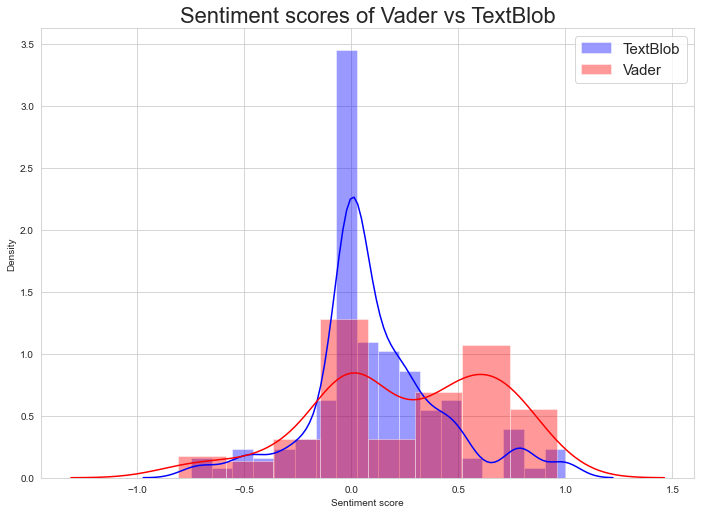

In [83]:
sns.set_style("whitegrid")
fig, ax = plt.subplots()
sns.distplot(tw_replies['TextBlob_sentiment'], ax=ax, label = 'TextBlob', color="b")
sns.distplot(tw_replies['Vader_sentiment'], ax=ax, label = 'Vader', color="r")
# Plot formatting
fig.set_size_inches(11.7, 8.27)
plt.legend(prop={'size': 15})
plt.title('Sentiment scores of Vader vs TextBlob',fontsize=22)
plt.xlabel('Sentiment score')
plt.ylabel('Density')

Let's use relplot type of seaborn chart to show relationship of the scores to each other:

Text(0.5, 1.0, 'Sentiment scores of Vader vs TextBlob')

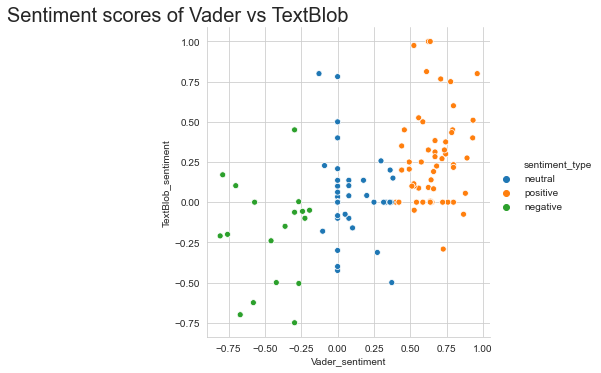

In [84]:
g = sns.relplot(x="Vader_sentiment", y="TextBlob_sentiment", hue="sentiment_type", data=tw_replies)
# Plot formatting
fig.set_size_inches(11.7, 8.27)
#plt.legend(prop={'size': 13}, loc='upper right')
# g.despine(left=True) if I wanted to remove left vertical axis
plt.title('Sentiment scores of Vader vs TextBlob', fontsize = 20, horizontalalignment = 'right')

## MODELING:

In [85]:
#Let's create a list of tokenized words that we'll need in a moment:
tokenized_words = [word_tokenize(i) for i in tweetz]

#### Word Embedding (Word2Vec):

**Word Embedding** is a type of word representation that allows words with similar meaning to be understood by machine learning algorithms. Technically speaking, it is a mapping of words into vectors of real numbers using the neural network, probabilistic model, or dimension reduction on word co-occurrence matrix. It is language modeling and feature learning technique. Word embedding is a way to perform mapping using a neural network. There are various word embedding models available such as word2vec (Google), Glove (Stanford) and fastest (Facebook).

Word Embedding is also called as distributed semantic model or distributed represented or semantic vector space or vector space model. As you read these names, you come across the word semantic which means categorizing similar words together. For example fruits like apple, mango, banana should be placed close whereas books will be far away from these words. In a broader sense, word embedding will create the vector of fruits which will be placed far away from vector representation of books.

In [86]:
#Creating Word2Vec model.
# Word2vec is a group of related models that are used to produce word embeddings. These models are shallow, two-layer neural networks that are trained to reconstruct linguistic contexts of words:
model = gensim.models.Word2Vec(tokenized_words, min_count=1)

In [87]:
#Downloading a component of NLTK ('abc' vocabulary):
nltk.download('abc')

[nltk_data] Downloading package abc to
[nltk_data]     C:\Users\oszer\AppData\Roaming\nltk_data...
[nltk_data]   Package abc is already up-to-date!


True

In [88]:
# Creating model based on abc set:
from nltk.corpus import abc
model= gensim.models.Word2Vec(abc.sents())
X= list(model.wv.vocab)
# Looking up most similar words to the word 'science':
data=model.wv.most_similar('science')
print(data)

[('law', 0.9456271529197693), ('agriculture', 0.9279515743255615), ('media', 0.9261307716369629), ('general', 0.9251962900161743), ('policy', 0.9237840175628662), ('discussion', 0.9187343120574951), ('Crean', 0.9175423979759216), ('practice', 0.9157251119613647), ('heritage', 0.9092051386833191), ('Hooke', 0.9084290862083435)]


In [89]:
#Finding most similar words in our tweets to our selected word ('solution'):
model.wv.most_similar("solution")

[('mechanism', 0.972183108329773),
 ('device', 0.9670164585113525),
 ('blow', 0.9572489857673645),
 ('wall', 0.95635986328125),
 ('approach', 0.9560889005661011),
 ('exercise', 0.9545398950576782),
 ('model', 0.9536567330360413),
 ('individual', 0.9524317383766174),
 ('concept', 0.951424241065979),
 ('message', 0.9510110020637512)]

In [90]:
#let's see what's most similar to another word ("fascination") in our tweets:
model.wv.most_similar("lost")

[('lowest', 0.9438772797584534),
 ('decade', 0.9320029020309448),
 ('highest', 0.9252729415893555),
 ('destroyed', 0.921619713306427),
 ('recorded', 0.9175570607185364),
 ('killed', 0.9141268730163574),
 ('fortnight', 0.912194013595581),
 ('roughly', 0.9119341969490051),
 ('vessel', 0.9098242521286011),
 ('sold', 0.9078898429870605)]

The score range is from 0 to 1, with 1 being maximum (therefore identical) similarity word. We can see that Word2vec didn't find any very similar words to those 2 I have picked in the corpus of the tweets above.

In [91]:
#Checking similarity of 2 given words:
similarity_two_words = model.wv.similarity('great','see')
print("Please provide the similarity between these two words:")
print(similarity_two_words)

Please provide the similarity between these two words:
0.6867205


### Bag of words:

Now that we've cleaned our corpus of tweets, we have put it in a form that can be used by our machine learning models. The model we'll be using is called the **bag of words** model.

This involves creating a document-term matrix -- a matrix with **documents** or tweets as the rows, and unique **terms** as the columns -- which we use the _CountVectorizer()_ function for from the NLTK package. 

In [92]:
# We specify that we need no more than 10000 features -- i.e. 1000 unique terms. Of course, this is an arbitrary number
# feel free to play around with this parameter!

# We also specify the min_df parameter to be 0.01. This means that our terms should at least be used in 1% of our 
# tweets.

# Finally, we specify an ngram_range of 1. This means that we're only looking for words -- an ngram_range of (1,2) 
# would include both words (length = 1) and phrases or combinations of words of length = 2 
vector = CountVectorizer(max_features= 10000 , min_df=0.01, ngram_range= (1,2))

# We use the fit_transform() function to apply the above to our tweets
bag_of_words = vector.fit_transform(tweetz)

bag_of_words

<131x416 sparse matrix of type '<class 'numpy.int64'>'
	with 1357 stored elements in Compressed Sparse Row format>

In [93]:
# Let's get our terms
vector.get_feature_names()

['abilities',
 'abilities inclusion',
 'able',
 'acceptable',
 'actually',
 'added',
 'address',
 'also',
 'amp',
 'apeldoornindata',
 'arduino',
 'arduino planetarduino',
 'around',
 'artsystemslf',
 'as_national',
 'available',
 'back',
 'bad',
 'barthelektronik',
 'best',
 'beyond',
 'big',
 'bits',
 'blacktopmediauk',
 'blacktopmediauk historicscc',
 'blynk_app',
 'box',
 'build',
 'buy',
 'bybox',
 'bybox designspark',
 'cadentgasltd',
 'cadentgasltd vg',
 'cfs',
 'charge',
 'check',
 'children',
 'children abilities',
 'com',
 'com arduino',
 'company',
 'complete',
 'components',
 'computer',
 'connectcommunitychallenge',
 'connectcommunitychallenge help',
 'connectcommunitychallenge idea',
 'connector',
 'connsupplier',
 'control',
 'cool',
 'correct',
 'could',
 'counter',
 'course',
 'covid',
 'covid retail',
 'cpc',
 'cpc_tweet',
 'cpc_tweet letsokdo',
 'creating',
 'creating us',
 'customer',
 'cut',
 'davidagraham',
 'davidagraham ebenupton',
 'davidagraham raspberry_pi',


In [94]:
# Find the sum of occurences of each term
sum_of_words = bag_of_words.sum(axis= 0)

# Create a list of tuples where each element represents the term in question and how many times it occurs in our 
# corpus.
words_freq = [(word, sum_of_words[0, idx]) for word, idx in vector.vocabulary_.items()]

# Sort in decreasing order of frequency.
words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)

words_freq

[('get', 22),
 ('raspberry_pi', 18),
 ('cpc_tweet', 18),
 ('letsokdo', 16),
 ('raspberry_pi cpc_tweet', 16),
 ('historicscc', 15),
 ('cpc_tweet letsokdo', 15),
 ('hacksterio', 13),
 ('davidagraham', 13),
 ('xchips', 12),
 ('esp', 12),
 ('get xchips', 12),
 ('pdc_racing', 12),
 ('order', 11),
 ('ebenupton', 11),
 ('davidagraham raspberry_pi', 10),
 ('pimoroni', 10),
 ('thepihut', 10),
 ('pdc_racing historicscc', 9),
 ('need', 9),
 ('xinabox', 9),
 ('letsokdo thepihut', 9),
 ('price', 9),
 ('people', 8),
 ('thanks', 8),
 ('please', 8),
 ('xchips esp', 8),
 ('help', 8),
 ('address', 8),
 ('sroadsports', 8),
 ('thepihut pimoroni', 8),
 ('also', 7),
 ('one', 7),
 ('connectcommunitychallenge', 7),
 ('idea', 7),
 ('time', 6),
 ('amp', 6),
 ('net', 6),
 ('esp net', 6),
 ('like', 6),
 ('back', 6),
 ('historicscc sroadsports', 6),
 ('isolation', 6),
 ('new', 6),
 ('ebenupton davidagraham', 6),
 ('part', 5),
 ('thank', 5),
 ('see', 5),
 ('net hacksterio', 5),
 ('used', 5),
 ('going', 5),
 ('join'

Text(0.5, 1.0, 'Bag of Words count')

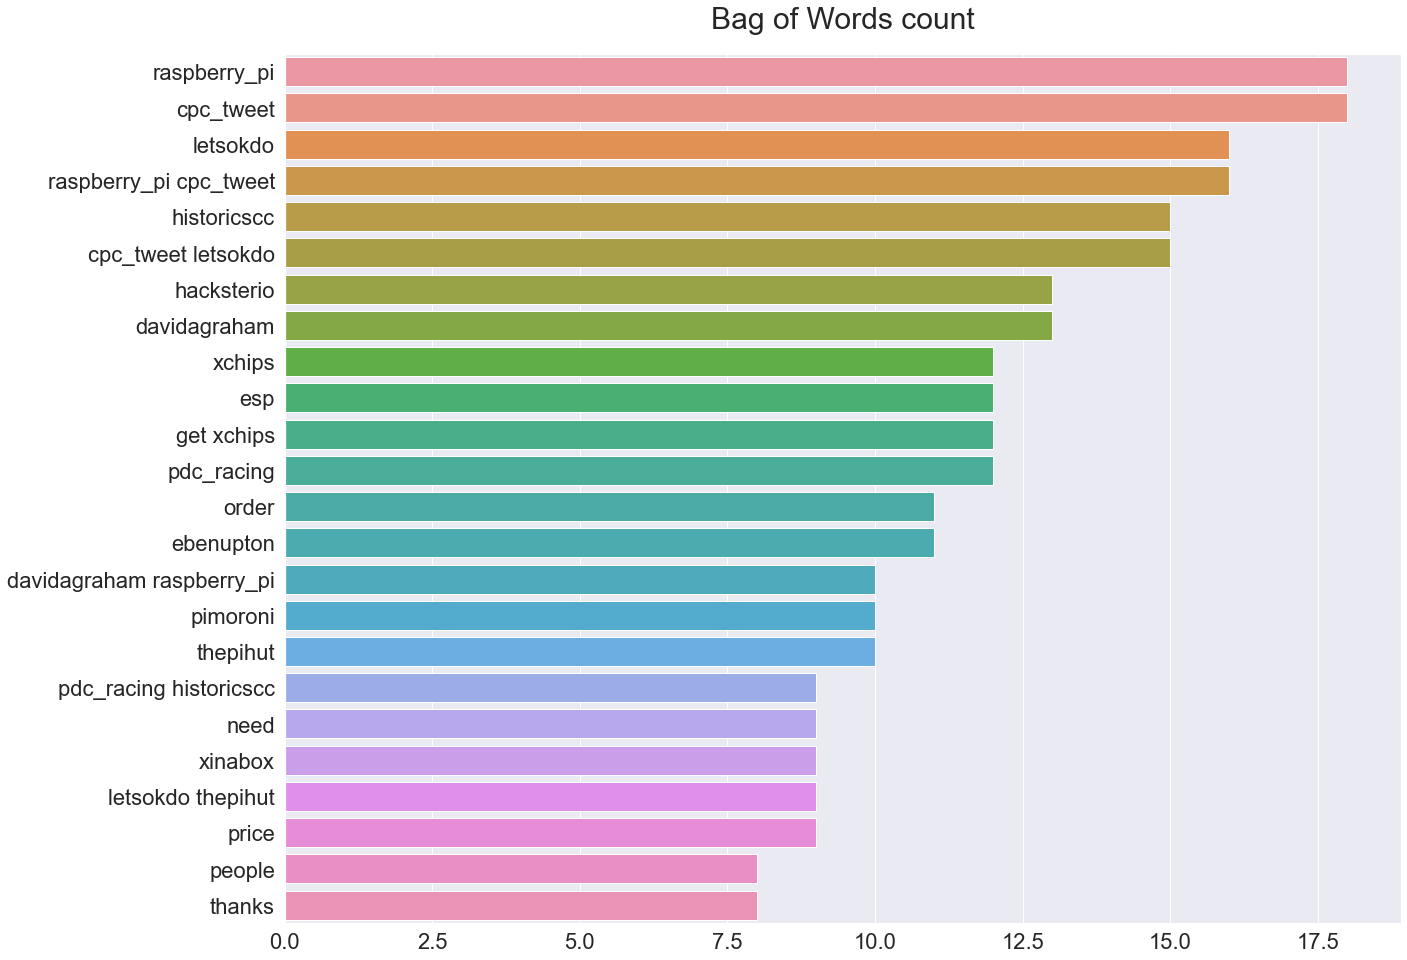

In [151]:
# Ignoring top word (which is "get" in this case)
top_words = words_freq[1:25]

word = []
count = []

for i, j in top_words: 
    word.append(i)
    count.append(j)

# Adjusting figure size
plt.figure(figsize = (20,16))
sns.set(font_scale=2) #Increasing size (scale) of the text font

# Plotting a barplot of most frequent words using Seaborn
sns.barplot(x = count, y = word)
plt.title('Bag of Words count', pad=25, fontsize = 30, horizontalalignment = 'center')

## Calculating word frequency and visualization

We can now count word frequency in already cleaned Design Spark tweets, visualize them and catch negative ones:

In [96]:
# Select the data we want to analyse

wdata = tw_replies["clean_text"]

In [97]:
wdata.sample()

89    @rscomponents @rsonline_dach brilliant team ef...
Name: clean_text, dtype: object

In [98]:
tweetz_neg = tweetz[tw_replies["sentiment_type"] == "negative"]

In [99]:
tweetz_neg.shape

(18,)

In [100]:
tweetz_pos = tweetz[tw_replies["sentiment_type"] == "positive"]

In [101]:
tweetz_pos.shape

(57,)

In [102]:
# Joining all the tokens together into a list of lists
#token_col = tokenized_words.to_list()

# Flatten the list into a single list of tokens
tokens = list(flatten(tokenized_words))

In [103]:
# Counting how many times each token appears:
token_counts = Counter(tokens)

In [104]:
# Getting the top 30 words:

top_thirty = pd.Series(token_counts).sort_values(ascending=False)[:30]
print(top_thirty)

get                          22
cpc_tweet                    18
raspberry_pi                 18
letsokdo                     16
historicscc                  15
hacksterio                   13
davidagraham                 13
esp                          12
xchips                       12
pdc_racing                   12
order                        11
ebenupton                    11
thepihut                     10
pimoroni                     10
xinabox                       9
price                         9
need                          9
help                          8
sroadsports                   8
people                        8
please                        8
thanks                        8
address                       8
one                           7
connectcommunitychallenge     7
idea                          7
also                          7
new                           6
isolation                     6
back                          6
dtype: int64


Text(0.5, 1.0, 'Top 30 words')

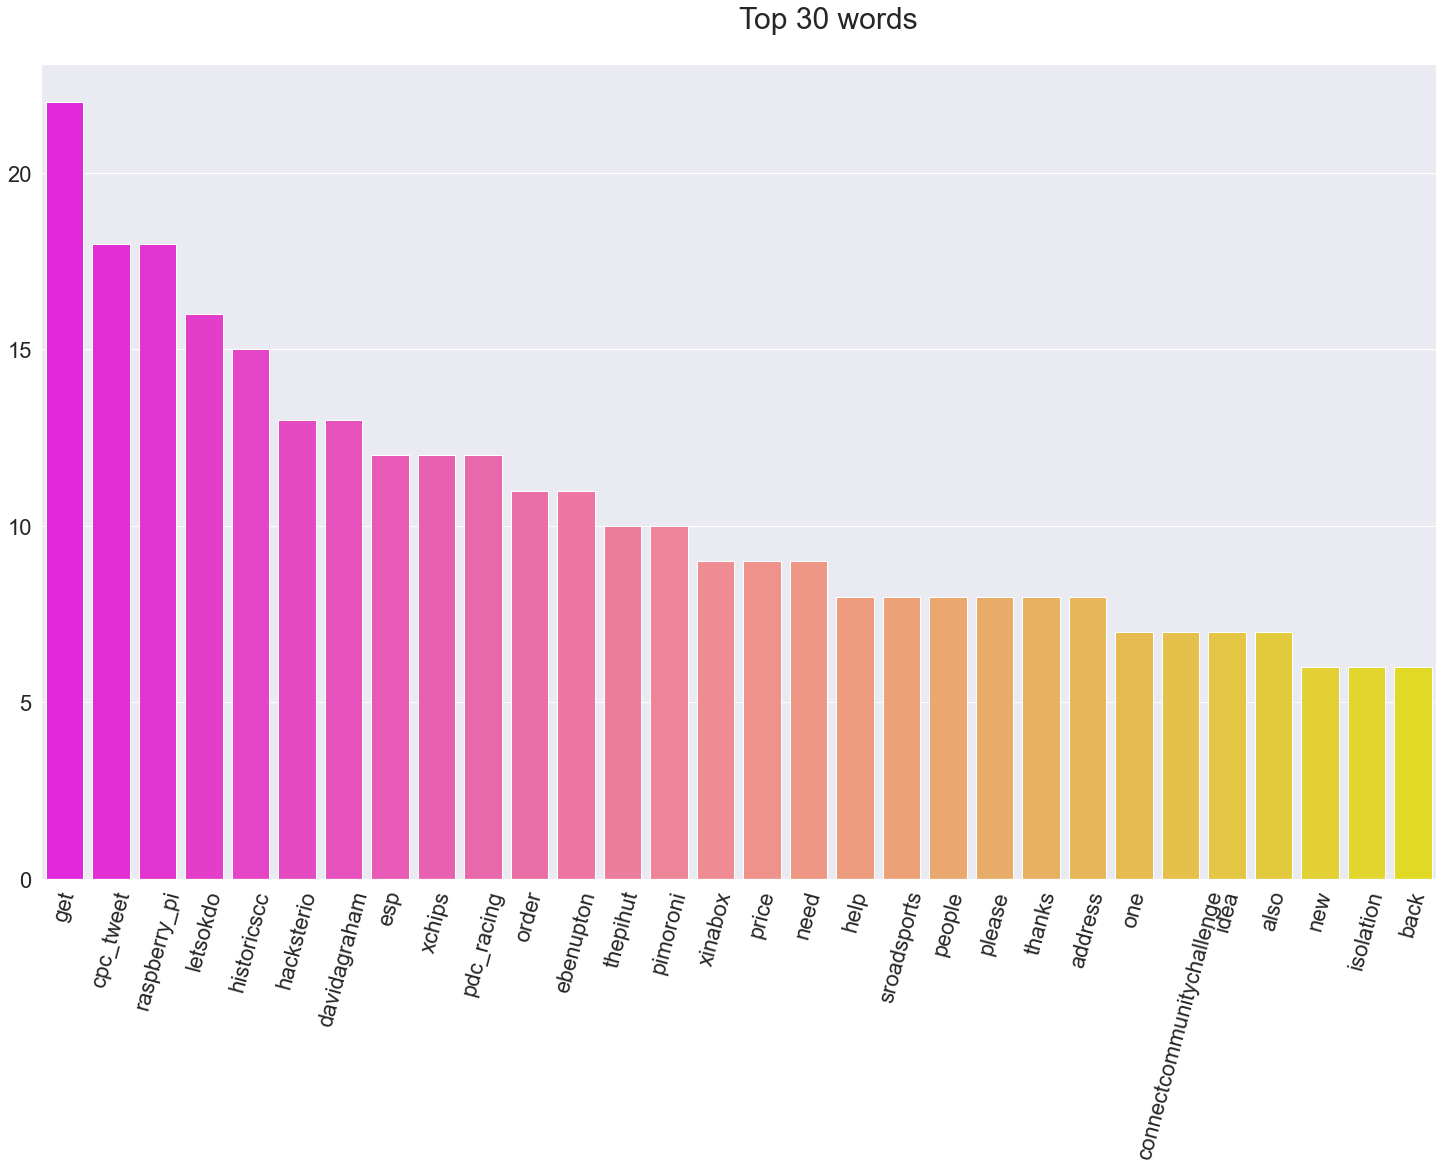

In [105]:
# Plot them as a barplot
sns.set_style("ticks")
sns.set(font_scale=2) #Increasing size (scale) of the text font
plt.figure(figsize=(25, 15))
plt.xticks(rotation=75)
sns.barplot(x=top_thirty.index, y=top_thirty, palette="spring")
plt.title('Top 30 words', pad=35, fontsize = 30, horizontalalignment = 'left')

In [106]:
#Let's create a list of tokenized negative words that we'll need in a moment:
tokenized_neg = [word_tokenize(i) for i in tweetz_neg]

In [107]:
#Let's create a list of tokenized positive words that we'll need in a moment:
tokenized_pos = [word_tokenize(i) for i in tweetz_pos]

In [108]:
# Joining all the tokens together into a list of lists

#token_col = data_neg.to_list()

# Flatten the list into a single list of tokens

tokens_neg = list(flatten(tokenized_neg))

In [109]:
# Counting how many times each tokenized word appears:

token_counts_neg = Counter(tokens_neg)

In [110]:
# Getting the top words used in negative context:

top_neg = pd.Series(token_counts_neg).sort_values(ascending=False)[:20]
print(top_neg)

address         6
order           5
please          4
davidagraham    3
payment         3
europe          3
x               3
raspberry_pi    3
cpc_tweet       3
letsokdo        3
thepihut        3
thing           2
also            2
delivery        2
sort            2
p               2
felder          2
process         2
new             2
lottechnik      2
dtype: int64


Text(0.5, 1.0, 'Top Negative words')

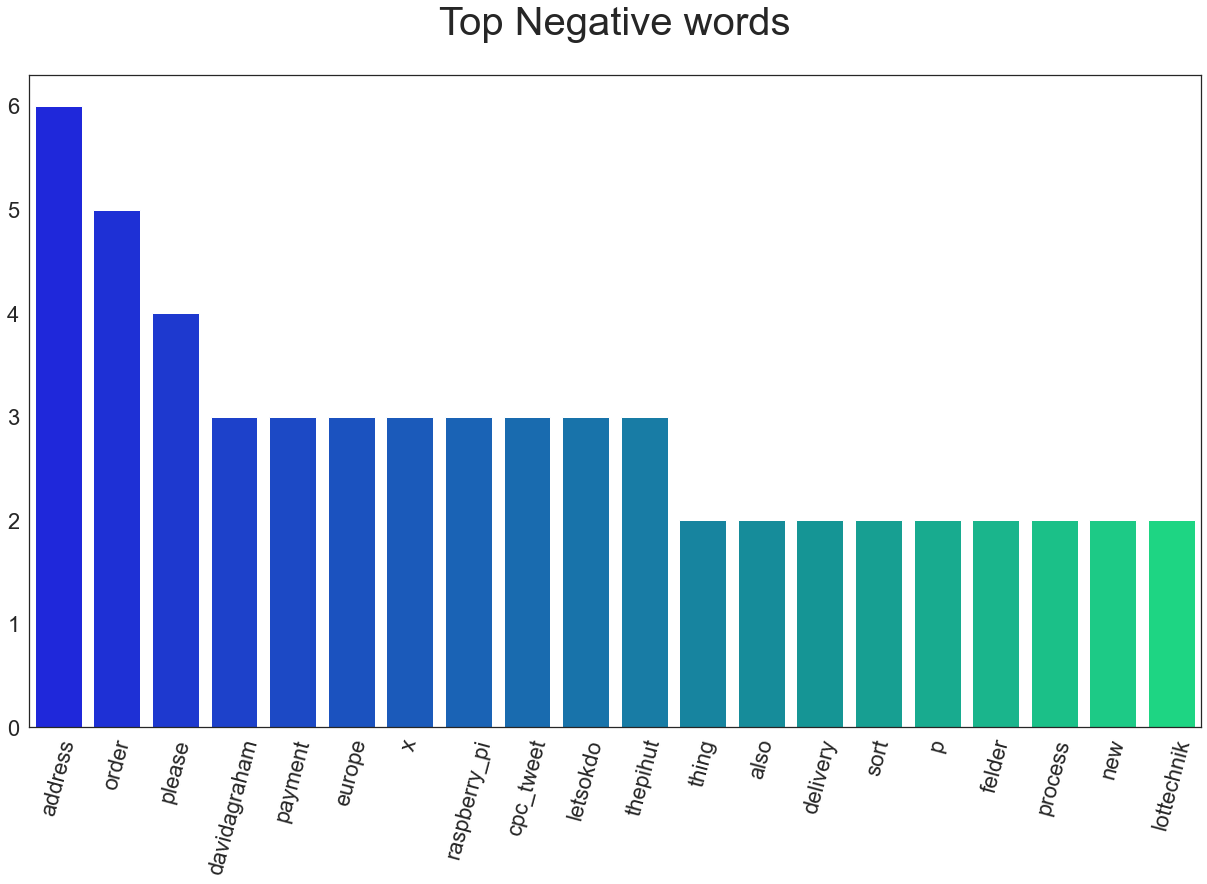

In [111]:
# Plot them as a barplot
sns.set_style("white")
ax.grid(False)
#sns.set(font_scale=1.75) #Increasing size (scale) of the text font
plt.figure(figsize=(21, 12))
plt.xticks(rotation=75)
sns.barplot(x=top_neg.index, y=top_neg, palette="winter")
# sns.set_context("poster", font_scale = 1.75, rc={"grid.linewidth": 0.5})
sns.set_context("poster", font_scale = 1.75, rc={'axes.grid' : False})
plt.title('Top Negative words', pad=40, fontsize = 40, horizontalalignment = 'center')

In [112]:
# Joining all the tokens together into a list of lists

# Flatten the list into a single list of tokens

tokens_pos = list(flatten(tokenized_pos))

In [113]:
# Counting how many times each tokenized positive word appears:

token_counts_pos = Counter(tokens_pos)

In [114]:
# Getting the top words used in positive context:

top_pos = pd.Series(token_counts_pos).sort_values(ascending=False)[:20]
print(top_pos)

cpc_tweet       9
thanks          8
letsokdo        7
raspberry_pi    7
pdc_racing      6
help            6
historicscc     6
davidagraham    5
thank           5
people          5
also            5
going           5
part            5
order           5
print           4
amp             4
price           4
first           4
see             4
need            4
dtype: int64


Text(0.5, 1.0, 'Top Positive words')

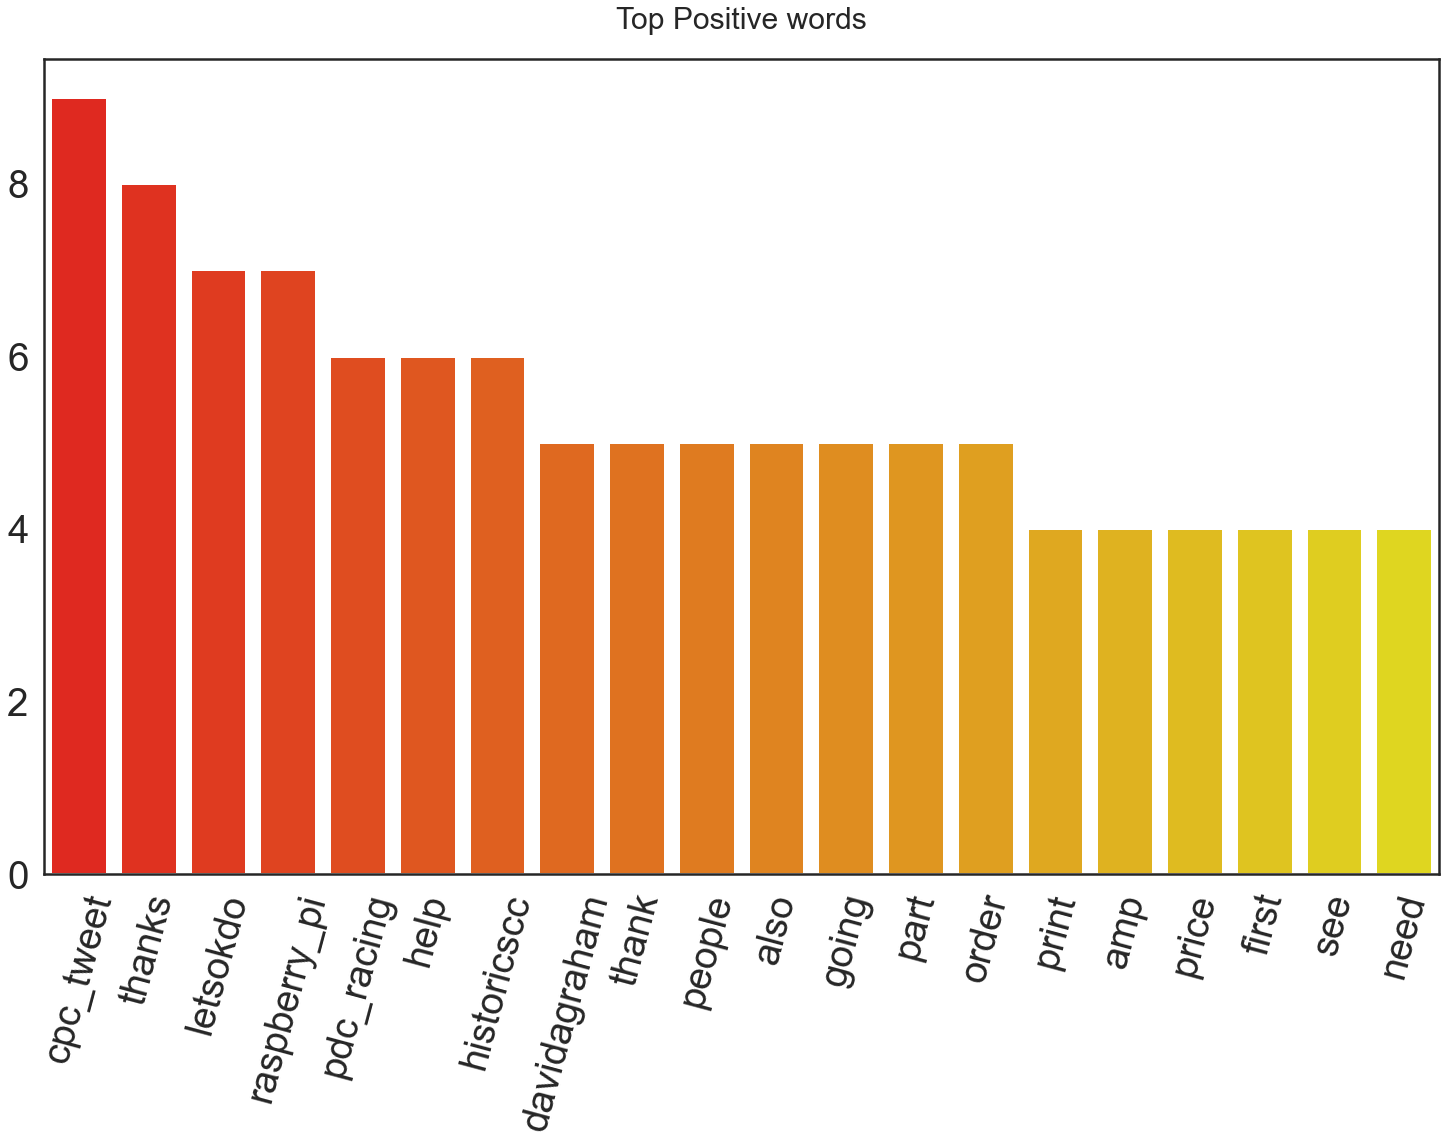

In [115]:
# Plot them as a barplot
#sns.set(font_scale=2) #Increasing size (scale) of the text font
sns.set_style("white")
plt.figure(figsize=(25, 15))
plt.xticks(rotation=75)
sns.barplot(x=top_pos.index, y=top_pos, palette="autumn")
sns.set_context("poster", font_scale = 1.75, rc={'axes.grid' : False})
plt.title('Top Positive words', pad=30, fontsize = 30, horizontalalignment = 'center')

## Creating word-clouds:

##### 1.First, let's create a word-cloud with top negative words:

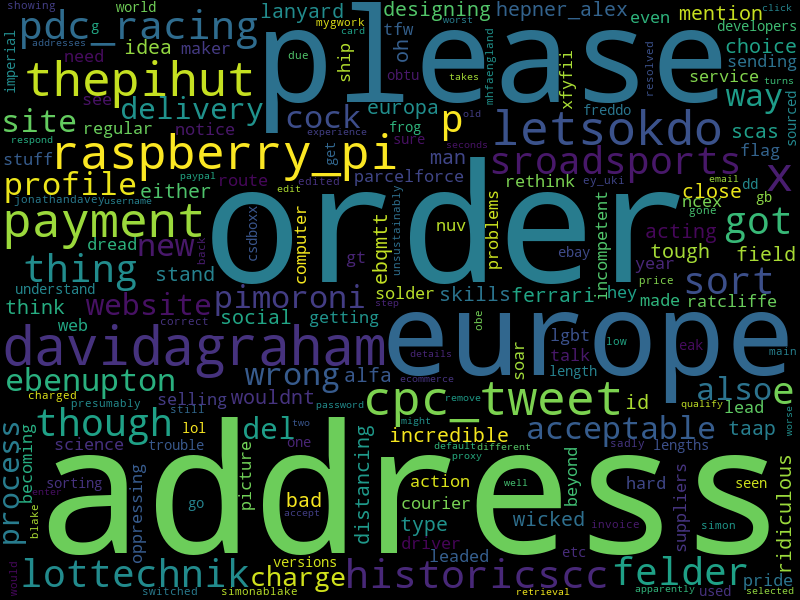

In [116]:
# Building a wordcloud object

fog_machine = WordCloud(width=800, height=600)

fog_machine.generate_from_frequencies(token_counts_neg)

fog_machine.to_image()

##### 2. Next -  let's create a word-cloud with top positive words:

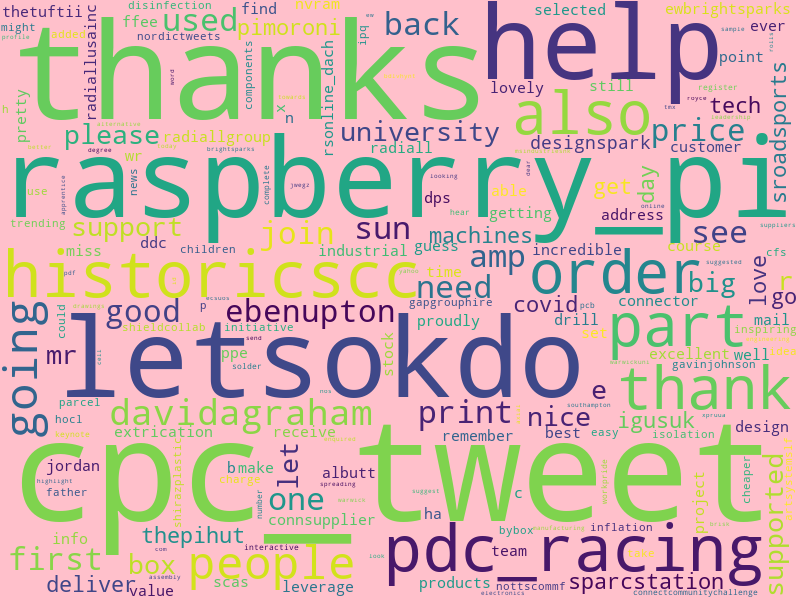

In [117]:
# Building a wordcloud object

fog_machine = WordCloud(width=800, height=600, background_color='pink')

fog_machine.generate_from_frequencies(token_counts_pos)

fog_machine.to_image()

##### 3. We can't omit to generate a word-cloud with all the most popular words:

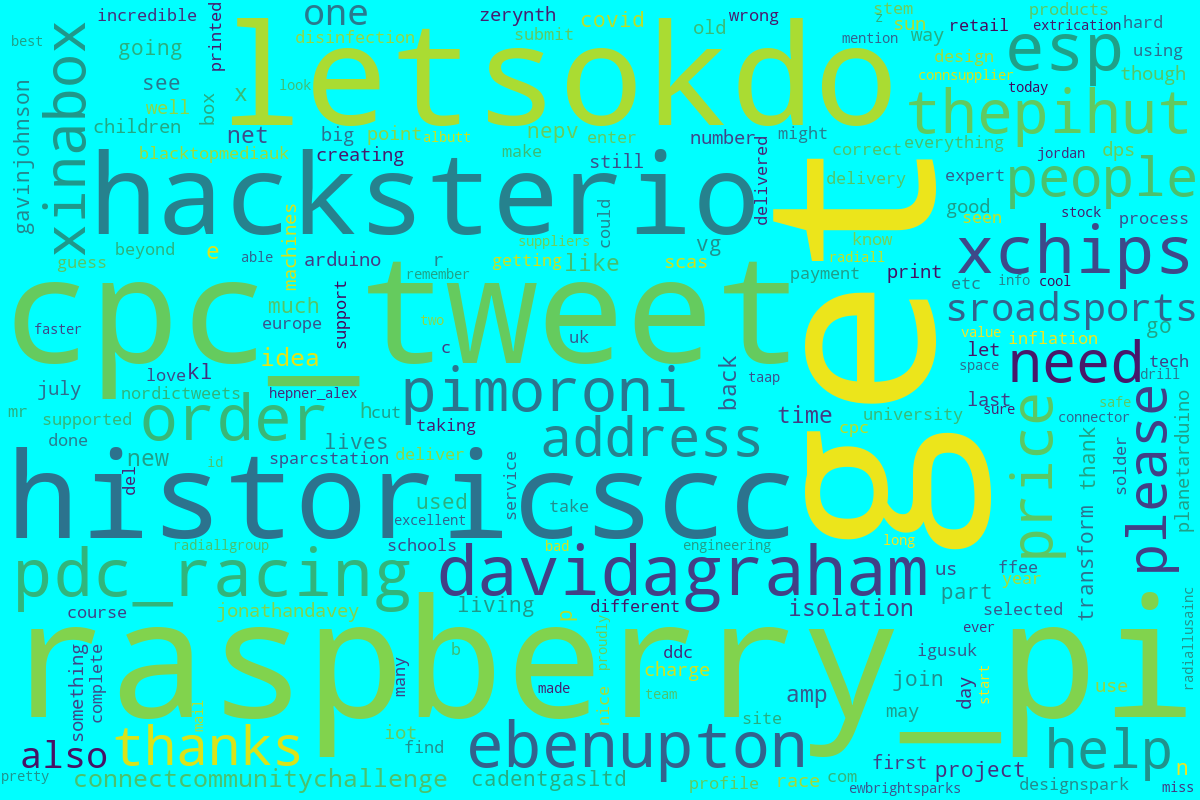

In [118]:
# Building a wordcloud object

fog_machine = WordCloud(width=1200, height=800, background_color='cyan')

fog_machine.generate_from_frequencies(token_counts)

fog_machine.to_image()

#### Let's change the background to our company logo - as a mask:

In [119]:
from PIL import Image
img = Image.open('../RS-logo-mask.png').convert('LA')
img.save('greyscale.png')

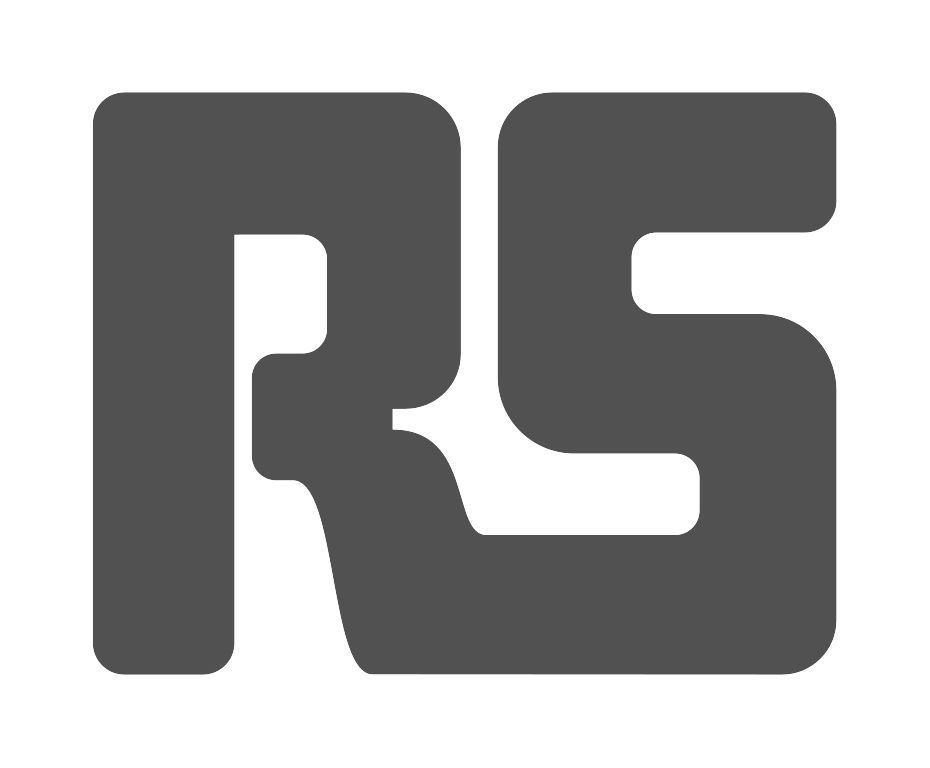

In [120]:
img

In machine learning, Python uses image data in the form of a NumPy array, i.e., [Height, Width, Channel] format.

In [121]:
#Converting the image to numpy array:
rs_mask =np.array(img)

In [122]:
rs_mask.shape

(768, 930, 2)

In [123]:
#Reducing the array to 2D format:
array = np.zeros((768,930))
array[:,:] = rs_mask[:,:,0]

In [124]:
array.shape

(768, 930)

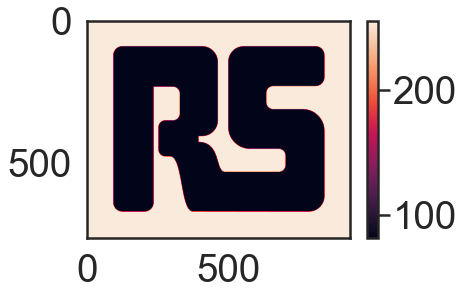

In [125]:
plt.imshow(array)
plt.colorbar()

In [126]:
array2 = np.zeros((768,930))
array2[:,:] = rs_mask[:,:,1]

In [127]:
array2.shape

(768, 930)

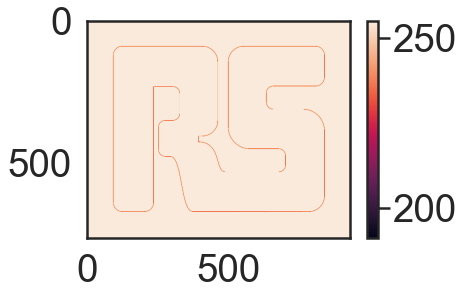

In [128]:
plt.imshow(array2)
plt.colorbar()

C:\Users\oszer\anaconda3\lib\site-packages\wordcloud\wordcloud.py:995: UserWarning:

mask image should be unsigned byte between 0 and 255. Got a float array



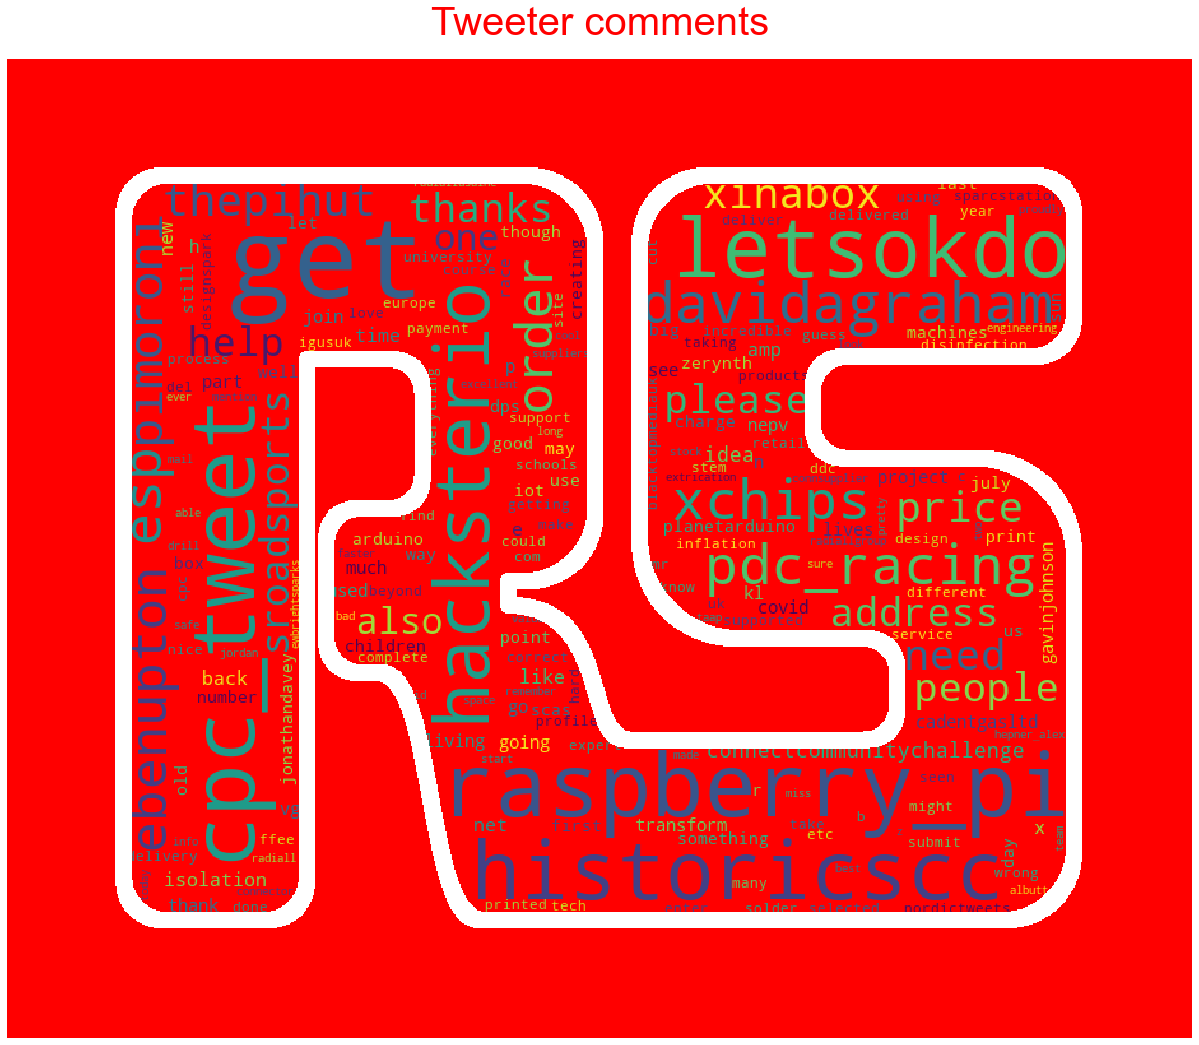

In [129]:
# Create a word cloud image in shape of the company logo:
wc = WordCloud(width=1800, height=1500, background_color = "red", mask=array, contour_width = 25, contour_color = "white")

# Generate a wordcloud
wc.generate_from_frequencies(token_counts)


# show
plt.figure(figsize=[30,18])
plt.imshow(wc, interpolation='nearest')
plt.title("Tweeter comments", pad=25, fontsize=40, color='red')
plt.axis("off")
plt.show()

In [130]:
tw_replies.sample(2)

,Text,Name,Screen Name,Client,Tweet Type,Media Type,Vader_sentiment,sentiment_type,clean_text,Vader_vector,TextBlob_vector,Score_Match,TextBlob_sentiment
27,@EbenUpton @Raspberry_Pi @cpc_tweet @RSCompone...,David Graham,DavidAGraham,"<a href=""http://twitter.com/download/android"" ...",Reply,NaN,0.5106,positive,@ebenupton @raspberry_pi @cpc_tweet @rscompone...,Neutral,Positive,False,0.1
87,@myGwork @MHFAEngland @EY_UKI @RSComponents Sa...,Simon Blake,SimonBlake,"<a href=""https://mobile.twitter.com"" rel=""nofo...",Reply,NaN,-0.4215,negative,@mygwork @mhfaengland @ey_uki @rscomponents sa...,Neutral,Negative,False,-0.5


In [131]:
tw_replies = tw_replies[['clean_text','sentiment_type']]

In [132]:
tw_replies.sample(2)

,clean_text,sentiment_type
123,hey @rscomponents by not selling the felder l...,negative
65,"we are pleased to welcome @rscomponents, its r...",positive


In [133]:
vector = CountVectorizer(max_features= 10000 , min_df=0.01, ngram_range= (1,2))

In [134]:
#vector = CountVectorizer(max_features= 10000 , min_df=0.01, ngram_range= (1,1))

In [135]:
# Using the train_test_split function
x_train, x_test, y_train, y_test = train_test_split(tw_replies['clean_text'], tw_replies['sentiment_type'],  
                                                   test_size = 0.3, random_state = 123)

In [136]:
# Let's see what our x_train looks like! I.e. our text data in our training set 
x_train

30     @ebenupton @davidagraham @raspberry_pi @cpc_tw...
156    so i guess @rscomponents will gladly dispatch ...
64     @n3dps @igusuk @rscomponents @bybox @designspa...
41     @9600 @designsparkrs @rscomponents 32 mb insta...
27     @9600 @astr0baby @designsparkrs @rscomponents ...
                             ...                        
73     your creative spark could help transform the l...
53     servo control with capacitive touch using xina...
1      @davidagraham @ebenupton @raspberry_pi @cpc_tw...
147    uv led technologies for disinfection and steri...
114    @rscomponents i've gone back to the main site,...
Name: clean_text, Length: 91, dtype: object

In [137]:
# Just to check, we can print the shape of each of our quadrants -- x_train, and x_test
print(x_train.shape,  x_test.shape)

# y_train and y_test
print(y_train.shape, y_test.shape)

(91,) (40,)
(91,) (40,)


In [138]:
# Fit bag of words model (Countvectorizer) to full text first
vector.fit(tw_replies['clean_text'])

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=10000, min_df=0.01,
                ngram_range=(1, 2), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [139]:
# Now we apply same feature transformation to both x_train, and x_test
x_train_bow = vector.transform(x_train)

x_test_bow = vector.transform(x_test)

In [140]:
print(x_train_bow)

  (0, 7)	1
  (0, 9)	1
  (0, 10)	1
  (0, 16)	1
  (0, 45)	1
  (0, 63)	2
  (0, 72)	1
  (0, 89)	1
  (0, 118)	1
  (0, 124)	2
  (0, 125)	1
  (0, 126)	1
  (0, 127)	1
  (0, 133)	1
  (0, 135)	1
  (0, 140)	1
  (0, 151)	1
  (0, 165)	1
  (0, 166)	1
  (0, 204)	2
  (0, 210)	1
  (0, 235)	1
  (0, 265)	1
  (0, 288)	1
  (0, 294)	3
  :	:
  (90, 69)	1
  (90, 226)	1
  (90, 233)	1
  (90, 265)	1
  (90, 288)	1
  (90, 351)	1
  (90, 359)	2
  (90, 371)	1
  (90, 373)	1
  (90, 392)	1
  (90, 402)	1
  (90, 437)	1
  (90, 471)	1
  (90, 520)	1
  (90, 537)	1
  (90, 563)	4
  (90, 567)	1
  (90, 595)	3
  (90, 605)	1
  (90, 631)	2
  (90, 640)	1
  (90, 641)	1
  (90, 648)	1
  (90, 670)	1
  (90, 678)	1


In [141]:
# Notice the same number of features 
print(x_train_bow.shape, x_test_bow.shape)

(91, 690) (40, 690)


In [142]:
vector.get_feature_names()

['000',
 '07',
 '0x0ddc0ffee',
 '0x0ddc0ffee designsparkrs',
 '10',
 '10 000',
 '10p',
 '18',
 '2020',
 '32',
 '32 57',
 '34',
 '34 07',
 '35',
 '3d',
 '3d printed',
 '57',
 '70sroadsports',
 '70sroadsports rscomponents',
 '924',
 '9600',
 '9600 designsparkrs',
 '99',
 'abilities',
 'abilities inclusion',
 'able',
 'able to',
 'about',
 'acceptable',
 'actually',
 'added',
 'address',
 'after',
 'after that',
 'all',
 'all abilities',
 'all children',
 'all the',
 'also',
 'also why',
 'amp',
 'an',
 'an idea',
 'an iot',
 'an order',
 'and',
 'and check',
 'and rs',
 'and rscomponents',
 'and simen',
 'and that',
 'and ubidots',
 'and xinabox',
 'and you',
 'any',
 'apeldoornindata',
 'arduino',
 'arduino planetarduino',
 'are',
 'around',
 'artsystemslf',
 'as',
 'as_national',
 'at',
 'at https',
 'at some',
 'at the',
 'available',
 'back',
 'back to',
 'bad',
 'barthelektronik',
 'be',
 'be an',
 'be the',
 'because',
 'been',
 'before',
 'being',
 'best',
 'between',
 'beyond',
 

Now we can call on sklearn's machine learning algorithms!


### Model 1:

One basic model that is typically used for text modelling is Naive Bayes:

In [143]:
# Using the MultinomialNB() function from sklearn
nb = MultinomialNB()
nb

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [144]:
# As with any machine learning model, we first fit/train it on the x_train_bow as our input and y_train on our output.
nb.fit(x_train_bow, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [145]:
# Make predictions based on new input, x_test_bow
predictions = nb.predict(x_test_bow)

predictions

array(['neutral', 'positive', 'negative', 'positive', 'positive',
       'neutral', 'positive', 'positive', 'neutral', 'negative',
       'positive', 'positive', 'positive', 'positive', 'positive',
       'positive', 'neutral', 'neutral', 'negative', 'positive',
       'positive', 'positive', 'positive', 'positive', 'positive',
       'positive', 'neutral', 'negative', 'positive', 'positive',
       'positive', 'neutral', 'neutral', 'positive', 'positive',
       'neutral', 'positive', 'neutral', 'positive', 'neutral'],
      dtype='<U8')

In [146]:
# Print the accuracy score
accuracy_score(y_test, predictions)

0.475

In [147]:
#Checking scoring measures for predictions:
print(classification_report(y_test, predictions, zero_division=1))

              precision    recall  f1-score   support

    negative       0.25      0.14      0.18         7
     neutral       0.55      0.46      0.50        13
    positive       0.48      0.60      0.53        20

    accuracy                           0.48        40
   macro avg       0.43      0.40      0.41        40
weighted avg       0.46      0.47      0.46        40



### Model 2:

let's try other machine learning algorithm - e.g. Decision Tree:

In [148]:
# Trying the decision tree
tree = DecisionTreeClassifier()

# Fitting our tree
tree.fit(x_train_bow, y_train)

# Making predictions
predictions_tree = tree.predict(x_test_bow)

In [149]:
accuracy_score(y_test, predictions_tree)

0.475

In [150]:
print(classification_report(y_test, predictions_tree))

              precision    recall  f1-score   support

    negative       0.00      0.00      0.00         7
     neutral       0.38      0.38      0.38        13
    positive       0.56      0.70      0.62        20

    accuracy                           0.48        40
   macro avg       0.31      0.36      0.34        40
weighted avg       0.41      0.47      0.44        40

